In [1]:
cd ../..

D:\Users\mrefoyo\Proyectos\RL-CFE


C:\Users\mrefoyo\miniconda3\envs\RL-CFE_39\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import os
import pickle
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf
import seaborn as sns
import plotly.express as px

from experiments.evaluation.evaluation_utils import load_dataset_for_eval, calculate_metrics_for_dataset, calculate_metrics_for_dataset_mp

print(tf.__version__)

2.13.0


In [3]:
DATASETS = [
    'CBF', 'CinCECGTorso', 'Coffee', "ECG200",
    "ECG5000", 'FacesUCR', 'FordA', 'GunPoint', 'HandOutlines',
    'ItalyPowerDemand', 'NonInvasiveFatalECGThorax2', 'Plane',
    'ProximalPhalanxOutlineCorrect',
    'Strawberry', 'TwoPatterns'
]
MO_UTILITY = np.array([0.1, 0.3, 0.4, 0.2])
model_to_explain = "inceptiontime_pytorch"
scaling = "standard"
osc_names = {"AE": "pytorch_ae_basic_train_scaling", "IF": "if_basic_train_scaling", "LOF": "lof_basic_train_scaling"}
methods = {
    "ng": "NG",
    "abcf": "AB-CF",
    "discox": "DiscoX",
    "9a44107d8e21ee80fd70c72382c3389102ce1096": "Multi-SpaCE",
    "_d55bf7de98ef9e8fa9e58d00f94de6247d287a6b": "FastPACE"
    
}


# Get results

In [4]:
# Data and aux data dict
data_dict = {}
models_dict = {}
outlier_calculators_dict = {}
possible_nuns_dict = {}
desired_classes_dict = {}
original_classes_dict = {}

# Results dicts
mean_results_dict = {}
methods_cfs_dict = {}
results_all_datasets_df = pd.DataFrame()
common_test_indexes_dict = {}

# Iterate through datasets
for dataset in DATASETS:
    print(f'Calculating metrics for {dataset}')
    # Load all info needed to get the counterfactual
    data_tuple, original_classes, model_wrapper, outlier_calculators, possible_nuns, desired_classes = load_dataset_for_eval(dataset, model_to_explain, osc_names, scaling=scaling)
    data_dict[dataset] = data_tuple
    models_dict[dataset] = model_wrapper
    outlier_calculators_dict[dataset] = outlier_calculators
    possible_nuns_dict[dataset] = possible_nuns
    desired_classes_dict[dataset] = desired_classes
    original_classes_dict[dataset] = original_classes

    # Get the metrics for all methods
    dataset_mean_std_df, dataset_results_df, method_cfs_dataset, common_test_indexes = calculate_metrics_for_dataset(
        dataset, methods, model_to_explain,
        data_tuple, original_classes, model_wrapper, outlier_calculators, possible_nuns,
        mo_weights=MO_UTILITY
    )
    mean_results_dict[dataset] = dataset_mean_std_df
    methods_cfs_dict[dataset] = method_cfs_dataset
    results_all_datasets_df = pd.concat([results_all_datasets_df, dataset_results_df])
    common_test_indexes_dict[dataset] = common_test_indexes

    # Store results
    # dataset_mean_std_df.to_csv(f'./experiments/evaluation/results_mean_metrics_{dataset}.csv', sep=";", index=False)

# Store all results
# results_all_datasets_df.to_csv(f'./experiments/evaluation/results_all.csv', sep=";", index=False)

Calculating metrics for CBF


C:\Users\mrefoyo\miniconda3\envs\RL-CFE_39\lib\site-packages\torch\nn\modules\conv.py:370: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\Convolution.cpp:1037.)
  return F.conv1d(
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:43: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  pad_needed = max(0, (L_out - 1) * self.s + (self.k - 1) * self.d + 1 - L_in)
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:46: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python valu

9a44107d8e21ee80fd70c72382c3389102ce1096


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.41it/s]


abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 15.36it/s]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 15.16it/s]


ng


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 15.37it/s]


_d55bf7de98ef9e8fa9e58d00f94de6247d287a6b


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 14.93it/s]


Calculating metrics for CinCECGTorso


D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:43: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  pad_needed = max(0, (L_out - 1) * self.s + (self.k - 1) * self.d + 1 - L_in)
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:46: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if pad_needed > 0:
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:47: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Pyt

9a44107d8e21ee80fd70c72382c3389102ce1096


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.10it/s]


abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 18.54it/s]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 18.98it/s]


ng


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 18.76it/s]


_d55bf7de98ef9e8fa9e58d00f94de6247d287a6b


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 18.07it/s]


Calculating metrics for Coffee


D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:43: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  pad_needed = max(0, (L_out - 1) * self.s + (self.k - 1) * self.d + 1 - L_in)
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:46: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if pad_needed > 0:
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:47: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Pyt

9a44107d8e21ee80fd70c72382c3389102ce1096


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:05<00:00,  4.87it/s]


abcf


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:01<00:00, 19.27it/s]


discox


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:01<00:00, 19.44it/s]


ng


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:01<00:00, 18.85it/s]


_d55bf7de98ef9e8fa9e58d00f94de6247d287a6b


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:01<00:00, 17.22it/s]


Calculating metrics for ECG200


D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:43: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  pad_needed = max(0, (L_out - 1) * self.s + (self.k - 1) * self.d + 1 - L_in)
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:46: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if pad_needed > 0:
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:47: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Pyt

9a44107d8e21ee80fd70c72382c3389102ce1096


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  8.07it/s]


abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.64it/s]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 14.03it/s]


ng


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.79it/s]


_d55bf7de98ef9e8fa9e58d00f94de6247d287a6b


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.68it/s]


Calculating metrics for ECG5000


D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:43: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  pad_needed = max(0, (L_out - 1) * self.s + (self.k - 1) * self.d + 1 - L_in)
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:46: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if pad_needed > 0:
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:47: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Pyt

9a44107d8e21ee80fd70c72382c3389102ce1096


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.72it/s]


abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 22.11it/s]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 16.57it/s]


ng


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 16.00it/s]


_d55bf7de98ef9e8fa9e58d00f94de6247d287a6b


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 16.98it/s]


Calculating metrics for FacesUCR


D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:43: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  pad_needed = max(0, (L_out - 1) * self.s + (self.k - 1) * self.d + 1 - L_in)
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:46: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if pad_needed > 0:
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:47: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Pyt

9a44107d8e21ee80fd70c72382c3389102ce1096


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.22it/s]


abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.30it/s]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.01it/s]


ng


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.62it/s]


_d55bf7de98ef9e8fa9e58d00f94de6247d287a6b


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.79it/s]


Calculating metrics for FordA


D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:43: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  pad_needed = max(0, (L_out - 1) * self.s + (self.k - 1) * self.d + 1 - L_in)
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:46: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if pad_needed > 0:
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:47: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Pyt

9a44107d8e21ee80fd70c72382c3389102ce1096


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:16<00:00,  6.17it/s]


abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.93it/s]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.52it/s]


ng


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:09<00:00, 10.67it/s]


_d55bf7de98ef9e8fa9e58d00f94de6247d287a6b


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.89it/s]


Calculating metrics for GunPoint


D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:43: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  pad_needed = max(0, (L_out - 1) * self.s + (self.k - 1) * self.d + 1 - L_in)
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:46: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if pad_needed > 0:
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:47: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Pyt

9a44107d8e21ee80fd70c72382c3389102ce1096


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.86it/s]


abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.03it/s]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:11<00:00,  8.59it/s]


ng


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.67it/s]


_d55bf7de98ef9e8fa9e58d00f94de6247d287a6b


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.58it/s]


Calculating metrics for HandOutlines


D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:43: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  pad_needed = max(0, (L_out - 1) * self.s + (self.k - 1) * self.d + 1 - L_in)
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:46: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if pad_needed > 0:
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:47: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Pyt

9a44107d8e21ee80fd70c72382c3389102ce1096


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:31<00:00,  3.19it/s]


abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.57it/s]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  8.21it/s]


ng


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  8.03it/s]


_d55bf7de98ef9e8fa9e58d00f94de6247d287a6b


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  8.03it/s]


Calculating metrics for ItalyPowerDemand


D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:43: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  pad_needed = max(0, (L_out - 1) * self.s + (self.k - 1) * self.d + 1 - L_in)
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:46: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if pad_needed > 0:
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:47: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Pyt

9a44107d8e21ee80fd70c72382c3389102ce1096


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:25<00:00,  3.96it/s]


abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:16<00:00,  6.07it/s]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:09<00:00, 10.82it/s]


ng


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.83it/s]


_d55bf7de98ef9e8fa9e58d00f94de6247d287a6b


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.88it/s]


Calculating metrics for NonInvasiveFatalECGThorax2


D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:43: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  pad_needed = max(0, (L_out - 1) * self.s + (self.k - 1) * self.d + 1 - L_in)
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:46: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if pad_needed > 0:
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:47: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Pyt

9a44107d8e21ee80fd70c72382c3389102ce1096


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.70it/s]


abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 16.24it/s]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 16.62it/s]


ng


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 15.80it/s]


_d55bf7de98ef9e8fa9e58d00f94de6247d287a6b


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 14.11it/s]


Calculating metrics for Plane


D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:43: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  pad_needed = max(0, (L_out - 1) * self.s + (self.k - 1) * self.d + 1 - L_in)
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:46: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if pad_needed > 0:
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:47: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Pyt

9a44107d8e21ee80fd70c72382c3389102ce1096


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.23it/s]


abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.55it/s]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.57it/s]


ng


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.89it/s]


_d55bf7de98ef9e8fa9e58d00f94de6247d287a6b


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.49it/s]


Calculating metrics for ProximalPhalanxOutlineCorrect


D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:43: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  pad_needed = max(0, (L_out - 1) * self.s + (self.k - 1) * self.d + 1 - L_in)
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:46: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if pad_needed > 0:
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:47: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Pyt

9a44107d8e21ee80fd70c72382c3389102ce1096


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.36it/s]


abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:09<00:00, 10.11it/s]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:09<00:00, 10.49it/s]


ng


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.67it/s]


_d55bf7de98ef9e8fa9e58d00f94de6247d287a6b


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.55it/s]


Calculating metrics for Strawberry


D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:43: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  pad_needed = max(0, (L_out - 1) * self.s + (self.k - 1) * self.d + 1 - L_in)
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:46: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if pad_needed > 0:
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:47: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Pyt

9a44107d8e21ee80fd70c72382c3389102ce1096


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.47it/s]


abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 14.32it/s]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 15.54it/s]


ng


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 14.54it/s]


_d55bf7de98ef9e8fa9e58d00f94de6247d287a6b


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 14.28it/s]


Calculating metrics for TwoPatterns


D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:43: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  pad_needed = max(0, (L_out - 1) * self.s + (self.k - 1) * self.d + 1 - L_in)
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:46: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if pad_needed > 0:
D:\Users\mrefoyo\Proyectos\RL-CFE\experiments\models\pytorch_model_utils.py:47: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Pyt

9a44107d8e21ee80fd70c72382c3389102ce1096


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.28it/s]


abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 17.11it/s]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 18.03it/s]


ng


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 17.20it/s]


_d55bf7de98ef9e8fa9e58d00f94de6247d287a6b


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 17.98it/s]


In [5]:
from IPython.display import display
for dataset in DATASETS:
    print(dataset)
    display(mean_results_dict[dataset])

CBF


,method,ii,nchanges,sparsity,L1,L2,proba,valid,nuns_valid,AE_OS,...,IF_IOS,LOF_IOS,subsequences,subsequences %,train_time,times,best cf index,fitness,nun_fitness,ImprovementOverNUN
0,Multi-SpaCE,453.74 ± 263.51,27.7 ± 8.16,0.22 ± 0.06,27.94 ± 7.52,6.13 ± 1.08,0.84 ± 0.1,1.0 ± 0.0,1.0 ± 0.0,0.77 ± 0.08,...,0.03 ± 0.06,0.02 ± 0.07,2.11 ± 0.6,0.03 ± 0.01,0.0 ± 0.0,2.05 ± 0.59,51.86 ± 30.79,-0.15 ± 0.02,-0.35 ± 0.02,0.2 ± 0.03
1,AB-CF,453.74 ± 263.51,66.12 ± 20.14,0.52 ± 0.16,50.43 ± 16.61,7.83 ± 2.0,0.75 ± 0.15,1.0 ± 0.0,1.0 ± 0.0,0.86 ± 0.12,...,0.07 ± 0.1,0.03 ± 0.05,2.08 ± 0.81,0.03 ± 0.01,0.0 ± 0.0,0.12 ± 0.53,0.0 ± 0.0,-0.26 ± 0.05,-0.35 ± 0.02,0.09 ± 0.06
2,DiscoX,453.74 ± 263.51,48.49 ± 15.92,0.38 ± 0.12,36.97 ± 16.1,6.25 ± 1.91,0.5 ± 0.04,1.0 ± 0.0,1.0 ± 0.0,0.76 ± 0.09,...,0.06 ± 0.09,0.05 ± 0.11,5.03 ± 2.47,0.08 ± 0.04,0.0 ± 0.0,5.52 ± 3.5,0.0 ± 0.0,-0.27 ± 0.05,-0.35 ± 0.02,0.08 ± 0.05
3,NG,453.74 ± 263.51,56.22 ± 11.26,0.44 ± 0.09,37.74 ± 8.93,6.33 ± 1.0,0.6 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.76 ± 0.07,...,0.04 ± 0.09,0.03 ± 0.08,1.0 ± 0.0,0.02 ± 0.0,0.0 ± 0.0,0.82 ± 1.05,0.0 ± 0.0,-0.22 ± 0.03,-0.35 ± 0.02,0.13 ± 0.03
4,FastPACE,453.74 ± 263.51,39.0 ± 12.27,0.3 ± 0.1,33.59 ± 8.84,6.46 ± 1.08,0.85 ± 0.1,1.0 ± 0.0,1.0 ± 0.0,0.76 ± 0.07,...,0.03 ± 0.06,0.02 ± 0.07,1.56 ± 0.54,0.02 ± 0.01,0.0 ± 0.0,0.27 ± 0.57,0.0 ± 0.0,-0.17 ± 0.03,-0.35 ± 0.02,0.18 ± 0.03


CinCECGTorso


,method,ii,nchanges,sparsity,L1,L2,proba,valid,nuns_valid,AE_OS,...,IF_IOS,LOF_IOS,subsequences,subsequences %,train_time,times,best cf index,fitness,nun_fitness,ImprovementOverNUN
0,Multi-SpaCE,679.81 ± 418.95,548.18 ± 722.33,0.33 ± 0.44,405.74 ± 500.85,22.74 ± 18.65,0.69 ± 0.23,1.0 ± 0.0,1.0 ± 0.0,0.38 ± 0.16,...,0.11 ± 0.2,0.45 ± 1.66,2.82 ± 2.5,0.0 ± 0.0,0.0 ± 0.0,23.16 ± 11.76,39.05 ± 35.06,-0.15 ± 0.1,-0.31 ± 0.04,0.16 ± 0.11
1,AB-CF,679.81 ± 418.95,770.99 ± 368.4,0.47 ± 0.22,515.55 ± 285.2,28.91 ± 14.72,0.59 ± 0.15,1.0 ± 0.0,1.0 ± 0.0,0.38 ± 0.12,...,0.13 ± 0.18,1.51 ± 3.16,2.34 ± 0.87,0.0 ± 0.0,0.0 ± 0.0,0.09 ± 0.38,0.0 ± 0.0,-0.19 ± 0.07,-0.31 ± 0.04,0.11 ± 0.08
2,DiscoX,679.81 ± 418.95,641.68 ± 299.28,0.39 ± 0.18,466.9 ± 221.7,28.37 ± 11.52,0.43 ± 0.06,1.0 ± 0.0,1.0 ± 0.0,0.38 ± 0.12,...,0.02 ± 0.05,0.53 ± 1.67,17.76 ± 23.67,0.02 ± 0.03,0.0 ± 0.0,125.24 ± 65.78,0.0 ± 0.0,-0.22 ± 0.08,-0.31 ± 0.04,0.08 ± 0.08
3,NG,679.81 ± 418.95,477.25 ± 298.05,0.29 ± 0.18,454.54 ± 264.52,30.05 ± 14.04,0.49 ± 0.12,1.0 ± 0.0,1.0 ± 0.0,0.4 ± 0.13,...,0.07 ± 0.11,0.98 ± 2.19,1.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,116.56 ± 95.86,0.0 ± 0.0,-0.13 ± 0.07,-0.31 ± 0.04,0.17 ± 0.06
4,FastPACE,679.81 ± 418.95,431.89 ± 221.5,0.26 ± 0.14,418.36 ± 240.44,28.74 ± 14.24,0.63 ± 0.12,1.0 ± 0.0,1.0 ± 0.0,0.37 ± 0.13,...,0.07 ± 0.11,0.41 ± 1.49,2.55 ± 2.27,0.0 ± 0.0,0.0 ± 0.0,0.55 ± 0.58,0.0 ± 0.0,-0.12 ± 0.04,-0.31 ± 0.04,0.18 ± 0.05


Coffee


,method,ii,nchanges,sparsity,L1,L2,proba,valid,nuns_valid,AE_OS,...,IF_IOS,LOF_IOS,subsequences,subsequences %,train_time,times,best cf index,fitness,nun_fitness,ImprovementOverNUN
0,Multi-SpaCE,13.5 ± 8.23,26.93 ± 10.73,0.09 ± 0.04,5.08 ± 1.71,1.11 ± 0.26,0.81 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.81 ± 0.12,...,0.02 ± 0.03,0.04 ± 0.08,2.71 ± 0.98,0.02 ± 0.01,0.0 ± 0.0,4.9 ± 1.08,50.21 ± 29.42,-0.1 ± 0.03,-0.32 ± 0.01,0.22 ± 0.03
1,AB-CF,13.5 ± 8.23,111.0 ± 52.51,0.39 ± 0.18,12.41 ± 4.76,1.51 ± 0.28,0.76 ± 0.15,1.0 ± 0.0,1.0 ± 0.0,0.81 ± 0.12,...,0.03 ± 0.04,0.05 ± 0.08,2.21 ± 0.57,0.02 ± 0.0,0.0 ± 0.0,0.19 ± 0.44,0.0 ± 0.0,-0.19 ± 0.06,-0.32 ± 0.01,0.14 ± 0.06
2,DiscoX,13.5 ± 8.23,108.93 ± 47.22,0.38 ± 0.17,22.67 ± 18.15,3.09 ± 2.74,0.51 ± 0.01,1.0 ± 0.0,1.0 ± 0.0,0.93 ± 0.24,...,0.1 ± 0.11,3.68 ± 5.87,10.04 ± 12.46,0.07 ± 0.09,0.0 ± 0.0,15.66 ± 8.47,0.0 ± 0.0,-0.28 ± 0.07,-0.32 ± 0.01,0.04 ± 0.07
3,NG,13.5 ± 8.23,69.43 ± 22.91,0.24 ± 0.08,8.59 ± 3.08,1.3 ± 0.36,0.56 ± 0.05,1.0 ± 0.0,1.0 ± 0.0,0.83 ± 0.1,...,0.03 ± 0.05,0.05 ± 0.09,1.0 ± 0.0,0.01 ± 0.0,0.0 ± 0.0,1.1 ± 0.83,0.0 ± 0.0,-0.14 ± 0.03,-0.32 ± 0.01,0.18 ± 0.03
4,FastPACE,13.5 ± 8.23,60.18 ± 21.55,0.21 ± 0.08,7.98 ± 2.55,1.27 ± 0.29,0.82 ± 0.09,1.0 ± 0.0,1.0 ± 0.0,0.8 ± 0.11,...,0.03 ± 0.05,0.05 ± 0.08,1.68 ± 0.67,0.01 ± 0.0,0.0 ± 0.0,0.4 ± 0.74,0.0 ± 0.0,-0.12 ± 0.03,-0.32 ± 0.01,0.21 ± 0.02


ECG200


,method,ii,nchanges,sparsity,L1,L2,proba,valid,nuns_valid,AE_OS,...,IF_IOS,LOF_IOS,subsequences,subsequences %,train_time,times,best cf index,fitness,nun_fitness,ImprovementOverNUN
0,Multi-SpaCE,49.5 ± 29.01,9.03 ± 4.54,0.09 ± 0.05,7.72 ± 4.3,2.85 ± 1.19,0.88 ± 0.11,1.0 ± 0.0,1.0 ± 0.0,0.42 ± 0.19,...,0.03 ± 0.04,0.21 ± 0.26,1.45 ± 0.61,0.03 ± 0.01,0.0 ± 0.0,1.62 ± 0.54,52.68 ± 31.6,-0.11 ± 0.03,-0.36 ± 0.01,0.25 ± 0.03
1,AB-CF,49.5 ± 29.01,63.36 ± 26.87,0.66 ± 0.28,25.17 ± 12.62,4.03 ± 1.65,0.87 ± 0.16,0.99 ± 0.1,1.0 ± 0.0,0.39 ± 0.14,...,0.1 ± 0.11,0.2 ± 0.26,1.64 ± 0.73,0.03 ± 0.02,0.0 ± 0.0,0.14 ± 0.24,0.0 ± 0.0,-0.29 ± 0.07,-0.36 ± 0.01,0.07 ± 0.07
2,DiscoX,49.5 ± 29.01,38.99 ± 18.76,0.41 ± 0.2,21.4 ± 16.37,4.38 ± 2.7,0.52 ± 0.02,0.86 ± 0.35,1.0 ± 0.0,0.38 ± 0.13,...,0.1 ± 0.14,0.56 ± 0.92,6.05 ± 4.41,0.13 ± 0.09,0.0 ± 0.0,7.62 ± 6.57,0.0 ± 0.0,-0.3 ± 0.07,-0.36 ± 0.01,0.06 ± 0.07
3,NG,49.5 ± 29.01,22.46 ± 18.2,0.23 ± 0.19,10.81 ± 6.94,2.95 ± 1.18,0.66 ± 0.13,1.0 ± 0.0,1.0 ± 0.0,0.43 ± 0.15,...,0.03 ± 0.04,0.18 ± 0.22,1.0 ± 0.0,0.02 ± 0.0,0.0 ± 0.0,0.52 ± 0.78,0.0 ± 0.0,-0.16 ± 0.06,-0.36 ± 0.01,0.2 ± 0.06
4,FastPACE,49.5 ± 29.01,15.23 ± 8.16,0.16 ± 0.08,9.74 ± 5.21,3.0 ± 1.35,0.88 ± 0.11,1.0 ± 0.0,1.0 ± 0.0,0.43 ± 0.16,...,0.04 ± 0.05,0.21 ± 0.26,1.52 ± 0.7,0.03 ± 0.01,0.0 ± 0.0,0.26 ± 0.34,0.0 ± 0.0,-0.13 ± 0.04,-0.36 ± 0.01,0.23 ± 0.04


ECG5000


,method,ii,nchanges,sparsity,L1,L2,proba,valid,nuns_valid,AE_OS,...,IF_IOS,LOF_IOS,subsequences,subsequences %,train_time,times,best cf index,fitness,nun_fitness,ImprovementOverNUN
0,Multi-SpaCE,2252.07 ± 1214.06,24.29 ± 8.76,0.17 ± 0.06,20.94 ± 9.38,4.75 ± 1.65,0.57 ± 0.17,1.0 ± 0.0,1.0 ± 0.0,0.23 ± 0.16,...,0.06 ± 0.04,0.15 ± 0.11,1.63 ± 0.69,0.02 ± 0.01,0.0 ± 0.0,2.14 ± 0.63,52.8 ± 30.71,-0.15 ± 0.03,-0.37 ± 0.02,0.22 ± 0.04
1,AB-CF,2252.07 ± 1214.06,116.26 ± 23.56,0.83 ± 0.17,63.37 ± 21.76,8.11 ± 2.47,0.57 ± 0.12,0.69 ± 0.46,1.0 ± 0.0,0.25 ± 0.21,...,0.24 ± 0.16,0.37 ± 0.28,1.3 ± 0.58,0.02 ± 0.01,0.0 ± 0.0,0.17 ± 0.42,0.0 ± 0.0,-0.34 ± 0.05,-0.37 ± 0.02,0.02 ± 0.04
2,DiscoX,2252.07 ± 1214.06,52.29 ± 24.28,0.37 ± 0.17,46.17 ± 15.2,8.57 ± 1.85,0.38 ± 0.06,0.96 ± 0.2,1.0 ± 0.0,0.28 ± 0.22,...,0.13 ± 0.09,0.6 ± 0.29,6.65 ± 3.72,0.09 ± 0.05,0.0 ± 0.0,12.87 ± 19.56,0.0 ± 0.0,-0.3 ± 0.06,-0.37 ± 0.02,0.07 ± 0.06
3,NG,2252.07 ± 1214.06,80.38 ± 48.33,0.57 ± 0.35,37.39 ± 19.69,5.35 ± 1.77,0.46 ± 0.07,1.0 ± 0.0,1.0 ± 0.0,0.22 ± 0.07,...,0.09 ± 0.09,0.17 ± 0.14,1.0 ± 0.0,0.01 ± 0.0,0.0 ± 0.0,0.79 ± 0.8,0.0 ± 0.0,-0.27 ± 0.11,-0.37 ± 0.02,0.1 ± 0.1
4,FastPACE,2252.07 ± 1214.06,35.54 ± 12.71,0.25 ± 0.09,27.16 ± 12.9,5.25 ± 1.87,0.6 ± 0.16,1.0 ± 0.0,1.0 ± 0.0,0.22 ± 0.16,...,0.07 ± 0.07,0.15 ± 0.12,1.4 ± 0.72,0.02 ± 0.01,0.0 ± 0.0,0.26 ± 0.55,0.0 ± 0.0,-0.17 ± 0.04,-0.37 ± 0.02,0.21 ± 0.04


FacesUCR


,method,ii,nchanges,sparsity,L1,L2,proba,valid,nuns_valid,AE_OS,...,IF_IOS,LOF_IOS,subsequences,subsequences %,train_time,times,best cf index,fitness,nun_fitness,ImprovementOverNUN
0,Multi-SpaCE,977.63 ± 568.84,23.95 ± 10.65,0.18 ± 0.08,21.91 ± 9.79,5.38 ± 1.78,0.7 ± 0.18,1.0 ± 0.0,1.0 ± 0.0,0.32 ± 0.12,...,0.03 ± 0.04,0.01 ± 0.03,2.07 ± 0.92,0.03 ± 0.01,0.0 ± 0.0,2.03 ± 0.55,53.08 ± 30.65,-0.15 ± 0.04,-0.35 ± 0.01,0.19 ± 0.04
1,AB-CF,977.63 ± 568.84,63.12 ± 20.3,0.48 ± 0.15,52.69 ± 20.23,8.4 ± 2.52,0.66 ± 0.19,0.97 ± 0.17,1.0 ± 0.0,0.39 ± 0.12,...,0.04 ± 0.08,0.05 ± 0.1,2.46 ± 0.76,0.04 ± 0.01,0.0 ± 0.0,0.11 ± 0.37,0.0 ± 0.0,-0.27 ± 0.06,-0.35 ± 0.01,0.07 ± 0.06
2,DiscoX,977.63 ± 568.84,76.02 ± 23.42,0.58 ± 0.18,64.41 ± 26.31,9.34 ± 2.94,0.3 ± 0.1,1.0 ± 0.0,1.0 ± 0.0,0.35 ± 0.1,...,0.1 ± 0.18,0.2 ± 0.3,4.25 ± 2.32,0.07 ± 0.04,0.0 ± 0.0,19.32 ± 11.5,0.0 ± 0.0,-0.36 ± 0.06,-0.35 ± 0.01,-0.01 ± 0.06
3,NG,977.63 ± 568.84,46.38 ± 20.3,0.35 ± 0.15,31.2 ± 15.02,5.74 ± 1.96,0.51 ± 0.15,1.0 ± 0.0,1.0 ± 0.0,0.32 ± 0.1,...,0.04 ± 0.07,0.01 ± 0.04,1.0 ± 0.0,0.02 ± 0.0,0.0 ± 0.0,0.6 ± 0.75,0.0 ± 0.0,-0.2 ± 0.05,-0.35 ± 0.01,0.14 ± 0.05
4,FastPACE,977.63 ± 568.84,46.91 ± 17.81,0.36 ± 0.14,34.92 ± 15.6,6.46 ± 2.15,0.79 ± 0.14,1.0 ± 0.0,1.0 ± 0.0,0.3 ± 0.1,...,0.03 ± 0.05,0.01 ± 0.03,1.29 ± 0.64,0.02 ± 0.01,0.0 ± 0.0,0.25 ± 0.55,0.0 ± 0.0,-0.18 ± 0.04,-0.35 ± 0.01,0.17 ± 0.04


FordA


,method,ii,nchanges,sparsity,L1,L2,proba,valid,nuns_valid,AE_OS,...,IF_IOS,LOF_IOS,subsequences,subsequences %,train_time,times,best cf index,fitness,nun_fitness,ImprovementOverNUN
0,Multi-SpaCE,626.89 ± 401.09,50.28 ± 43.53,0.1 ± 0.09,49.24 ± 43.67,7.59 ± 3.68,0.83 ± 0.14,1.0 ± 0.0,1.0 ± 0.0,0.53 ± 0.31,...,0.04 ± 0.07,0.02 ± 0.04,3.81 ± 2.17,0.02 ± 0.01,0.0 ± 0.0,5.3 ± 1.49,39.5 ± 33.03,-0.15 ± 0.09,-0.3 ± 0.01,0.15 ± 0.09
1,AB-CF,626.89 ± 401.09,319.19 ± 119.46,0.64 ± 0.24,241.86 ± 101.51,16.3 ± 4.99,0.83 ± 0.17,0.99 ± 0.1,1.0 ± 0.0,0.41 ± 0.22,...,0.14 ± 0.18,0.03 ± 0.07,2.33 ± 0.96,0.01 ± 0.0,0.0 ± 0.0,13.12 ± 0.81,0.0 ± 0.0,-0.28 ± 0.08,-0.3 ± 0.01,0.03 ± 0.08
2,DiscoX,626.89 ± 401.09,300.18 ± 92.58,0.6 ± 0.19,172.8 ± 83.76,12.91 ± 4.99,0.54 ± 0.03,0.72 ± 0.45,1.0 ± 0.0,0.56 ± 0.27,...,0.01 ± 0.04,0.02 ± 0.04,12.56 ± 14.43,0.05 ± 0.06,0.0 ± 0.0,56.24 ± 23.46,0.0 ± 0.0,-0.37 ± 0.08,-0.3 ± 0.01,-0.07 ± 0.08
3,NG,626.89 ± 401.09,211.73 ± 102.69,0.42 ± 0.21,164.98 ± 84.53,13.43 ± 4.8,0.64 ± 0.13,1.0 ± 0.0,1.0 ± 0.0,0.35 ± 0.14,...,0.1 ± 0.16,0.03 ± 0.05,1.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,6.55 ± 3.83,0.0 ± 0.0,-0.2 ± 0.06,-0.3 ± 0.01,0.11 ± 0.06
4,FastPACE,626.89 ± 401.09,220.1 ± 107.84,0.44 ± 0.22,176.05 ± 91.6,14.09 ± 4.82,0.91 ± 0.1,1.0 ± 0.0,1.0 ± 0.0,0.28 ± 0.1,...,0.09 ± 0.15,0.02 ± 0.06,1.41 ± 0.6,0.01 ± 0.0,0.0 ± 0.0,0.31 ± 0.58,0.0 ± 0.0,-0.17 ± 0.06,-0.3 ± 0.01,0.13 ± 0.06


GunPoint


,method,ii,nchanges,sparsity,L1,L2,proba,valid,nuns_valid,AE_OS,...,IF_IOS,LOF_IOS,subsequences,subsequences %,train_time,times,best cf index,fitness,nun_fitness,ImprovementOverNUN
0,Multi-SpaCE,73.78 ± 40.93,26.0 ± 11.95,0.17 ± 0.08,10.59 ± 8.86,2.3 ± 1.75,0.83 ± 0.14,1.0 ± 0.0,1.0 ± 0.0,0.48 ± 0.16,...,0.03 ± 0.04,0.0 ± 0.01,1.43 ± 0.66,0.02 ± 0.01,0.0 ± 0.0,2.39 ± 0.57,48.2 ± 32.74,-0.13 ± 0.06,-0.34 ± 0.01,0.2 ± 0.06
1,AB-CF,73.78 ± 40.93,96.6 ± 28.71,0.64 ± 0.19,18.34 ± 14.77,2.57 ± 1.82,0.85 ± 0.15,1.0 ± 0.0,1.0 ± 0.0,0.63 ± 0.35,...,0.03 ± 0.05,0.01 ± 0.02,2.25 ± 0.64,0.03 ± 0.01,0.0 ± 0.0,0.14 ± 0.38,0.0 ± 0.0,-0.32 ± 0.07,-0.34 ± 0.01,0.02 ± 0.07
2,DiscoX,73.78 ± 40.93,56.98 ± 28.5,0.38 ± 0.19,20.23 ± 16.72,3.29 ± 2.22,0.53 ± 0.02,0.91 ± 0.29,1.0 ± 0.0,0.88 ± 0.5,...,0.07 ± 0.07,0.02 ± 0.06,8.71 ± 9.15,0.12 ± 0.12,0.0 ± 0.0,11.61 ± 12.88,0.0 ± 0.0,-0.37 ± 0.11,-0.34 ± 0.01,-0.03 ± 0.12
3,NG,73.78 ± 40.93,35.17 ± 25.29,0.23 ± 0.17,11.79 ± 11.4,2.26 ± 1.82,0.59 ± 0.12,1.0 ± 0.0,1.0 ± 0.0,0.57 ± 0.39,...,0.03 ± 0.04,0.0 ± 0.01,1.0 ± 0.0,0.01 ± 0.0,0.0 ± 0.0,0.56 ± 0.74,0.0 ± 0.0,-0.18 ± 0.06,-0.34 ± 0.01,0.16 ± 0.06
4,FastPACE,73.78 ± 40.93,43.96 ± 26.11,0.29 ± 0.17,15.15 ± 12.95,2.63 ± 1.9,0.89 ± 0.11,1.0 ± 0.0,1.0 ± 0.0,0.45 ± 0.22,...,0.03 ± 0.05,0.01 ± 0.02,1.18 ± 0.41,0.02 ± 0.01,0.0 ± 0.0,0.28 ± 0.59,0.0 ± 0.0,-0.15 ± 0.06,-0.34 ± 0.01,0.19 ± 0.06


HandOutlines


,method,ii,nchanges,sparsity,L1,L2,proba,valid,nuns_valid,AE_OS,...,IF_IOS,LOF_IOS,subsequences,subsequences %,train_time,times,best cf index,fitness,nun_fitness,ImprovementOverNUN
0,Multi-SpaCE,167.28 ± 108.07,20.41 ± 12.45,0.01 ± 0.0,2.12 ± 1.52,0.48 ± 0.25,0.91 ± 0.07,1.0 ± 0.0,1.0 ± 0.0,0.52 ± 0.08,...,0.0 ± 0.0,0.0 ± 0.0,1.5 ± 0.95,0.0 ± 0.0,0.0 ± 0.0,36.99 ± 0.9,54.04 ± 33.98,0.0 ± 0.03,-0.29 ± 0.02,0.29 ± 0.03
1,AB-CF,167.28 ± 108.07,1845.0 ± 699.86,0.68 ± 0.26,137.22 ± 79.55,3.94 ± 1.83,0.79 ± 0.16,0.84 ± 0.37,1.0 ± 0.0,0.55 ± 0.06,...,0.01 ± 0.01,0.01 ± 0.01,2.68 ± 1.14,0.0 ± 0.0,0.0 ± 0.0,0.44 ± 0.4,0.0 ± 0.0,-0.23 ± 0.07,-0.29 ± 0.02,0.06 ± 0.07
2,DiscoX,167.28 ± 108.07,811.97 ± 440.42,0.3 ± 0.16,82.26 ± 75.36,3.72 ± 2.54,0.52 ± 0.02,0.95 ± 0.22,1.0 ± 0.0,0.56 ± 0.08,...,0.02 ± 0.03,0.03 ± 0.03,127.59 ± 135.99,0.09 ± 0.1,0.0 ± 0.0,159.35 ± 214.21,0.0 ± 0.0,-0.25 ± 0.09,-0.29 ± 0.02,0.03 ± 0.09
3,NG,167.28 ± 108.07,709.27 ± 498.3,0.26 ± 0.18,50.46 ± 47.38,2.12 ± 1.49,0.58 ± 0.14,1.0 ± 0.0,1.0 ± 0.0,0.5 ± 0.04,...,0.0 ± 0.01,0.0 ± 0.01,1.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,447.82 ± 456.81,0.0 ± 0.0,-0.1 ± 0.05,-0.29 ± 0.02,0.19 ± 0.05
4,FastPACE,167.28 ± 108.07,341.7 ± 223.69,0.13 ± 0.08,34.64 ± 36.19,2.01 ± 1.25,0.86 ± 0.11,1.0 ± 0.0,1.0 ± 0.0,0.53 ± 0.05,...,0.0 ± 0.01,0.0 ± 0.0,2.03 ± 1.23,0.0 ± 0.0,0.0 ± 0.0,0.79 ± 0.59,0.0 ± 0.0,-0.04 ± 0.03,-0.29 ± 0.02,0.24 ± 0.03


ItalyPowerDemand


,method,ii,nchanges,sparsity,L1,L2,proba,valid,nuns_valid,AE_OS,...,IF_IOS,LOF_IOS,subsequences,subsequences %,train_time,times,best cf index,fitness,nun_fitness,ImprovementOverNUN
0,Multi-SpaCE,545.74 ± 297.62,4.4 ± 2.55,0.18 ± 0.11,3.37 ± 2.45,1.7 ± 0.89,0.89 ± 0.1,1.0 ± 0.0,1.0 ± 0.0,0.6 ± 0.26,...,0.01 ± 0.01,0.03 ± 0.06,1.05 ± 0.22,0.09 ± 0.02,0.0 ± 0.0,1.22 ± 0.53,60.25 ± 35.35,-0.19 ± 0.04,-0.43 ± 0.02,0.23 ± 0.04
1,AB-CF,545.74 ± 297.62,12.18 ± 5.83,0.51 ± 0.24,3.94 ± 1.95,1.47 ± 0.61,0.86 ± 0.16,0.79 ± 0.41,1.0 ± 0.0,0.59 ± 0.27,...,0.01 ± 0.02,0.0 ± 0.02,1.87 ± 0.72,0.16 ± 0.06,0.0 ± 0.0,0.32 ± 1.08,0.0 ± 0.0,-0.33 ± 0.09,-0.43 ± 0.02,0.09 ± 0.08
2,DiscoX,545.74 ± 297.62,12.21 ± 4.21,0.51 ± 0.18,7.49 ± 4.53,2.51 ± 1.35,0.53 ± 0.03,0.47 ± 0.5,1.0 ± 0.0,0.76 ± 0.33,...,0.14 ± 0.13,0.42 ± 0.49,1.72 ± 0.99,0.14 ± 0.08,0.0 ± 0.0,7.31 ± 4.86,0.0 ± 0.0,-0.38 ± 0.07,-0.43 ± 0.02,0.05 ± 0.07
3,NG,545.74 ± 297.62,8.31 ± 5.04,0.35 ± 0.21,4.03 ± 3.05,1.71 ± 0.95,0.87 ± 0.13,1.0 ± 0.0,1.0 ± 0.0,0.64 ± 0.22,...,0.0 ± 0.01,0.03 ± 0.06,1.0 ± 0.0,0.08 ± 0.0,0.0 ± 0.0,0.42 ± 0.74,0.0 ± 0.0,-0.25 ± 0.06,-0.43 ± 0.02,0.17 ± 0.07
4,FastPACE,545.74 ± 297.62,5.46 ± 3.62,0.23 ± 0.15,3.59 ± 2.53,1.72 ± 0.9,0.9 ± 0.1,1.0 ± 0.0,1.0 ± 0.0,0.59 ± 0.24,...,0.0 ± 0.01,0.02 ± 0.06,1.05 ± 0.22,0.09 ± 0.02,0.0 ± 0.0,0.28 ± 0.56,0.0 ± 0.0,-0.2 ± 0.05,-0.43 ± 0.02,0.22 ± 0.05


NonInvasiveFatalECGThorax2


,method,ii,nchanges,sparsity,L1,L2,proba,valid,nuns_valid,AE_OS,...,IF_IOS,LOF_IOS,subsequences,subsequences %,train_time,times,best cf index,fitness,nun_fitness,ImprovementOverNUN
0,Multi-SpaCE,985.29 ± 574.39,70.17 ± 65.64,0.09 ± 0.09,12.98 ± 10.52,1.8 ± 1.04,0.78 ± 0.14,1.0 ± 0.0,1.0 ± 0.0,0.32 ± 0.08,...,0.0 ± 0.01,0.02 ± 0.03,3.35 ± 1.78,0.01 ± 0.0,0.0 ± 0.0,12.51 ± 4.56,46.57 ± 27.87,-0.08 ± 0.05,-0.29 ± 0.01,0.21 ± 0.05
1,AB-CF,985.29 ± 574.39,403.79 ± 170.66,0.54 ± 0.23,49.78 ± 26.35,3.88 ± 2.4,0.8 ± 0.18,0.99 ± 0.1,1.0 ± 0.0,0.29 ± 0.08,...,0.02 ± 0.04,0.04 ± 0.05,2.27 ± 0.81,0.01 ± 0.0,0.0 ± 0.0,0.58 ± 0.42,0.0 ± 0.0,-0.2 ± 0.07,-0.29 ± 0.01,0.1 ± 0.07
2,DiscoX,985.29 ± 574.39,322.16 ± 105.33,0.43 ± 0.14,124.01 ± 78.18,10.57 ± 6.24,0.42 ± 0.09,1.0 ± 0.0,1.0 ± 0.0,0.51 ± 0.19,...,0.11 ± 0.12,0.32 ± 0.29,17.92 ± 15.21,0.05 ± 0.04,0.0 ± 0.0,37.01 ± 26.08,0.0 ± 0.0,-0.31 ± 0.07,-0.29 ± 0.01,-0.01 ± 0.07
3,NG,985.29 ± 574.39,264.25 ± 186.46,0.35 ± 0.25,28.22 ± 20.69,2.3 ± 1.21,0.52 ± 0.09,1.0 ± 0.0,1.0 ± 0.0,0.27 ± 0.07,...,0.01 ± 0.02,0.02 ± 0.02,1.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,16.6 ± 14.34,0.0 ± 0.0,-0.15 ± 0.08,-0.29 ± 0.01,0.15 ± 0.08
4,FastPACE,985.29 ± 574.39,169.35 ± 96.84,0.23 ± 0.13,23.56 ± 16.22,2.25 ± 1.22,0.83 ± 0.12,1.0 ± 0.0,1.0 ± 0.0,0.28 ± 0.06,...,0.0 ± 0.01,0.02 ± 0.03,2.15 ± 1.11,0.01 ± 0.0,0.0 ± 0.0,0.35 ± 0.57,0.0 ± 0.0,-0.1 ± 0.04,-0.29 ± 0.01,0.2 ± 0.04


Plane


,method,ii,nchanges,sparsity,L1,L2,proba,valid,nuns_valid,AE_OS,...,IF_IOS,LOF_IOS,subsequences,subsequences %,train_time,times,best cf index,fitness,nun_fitness,ImprovementOverNUN
0,Multi-SpaCE,52.55 ± 30.34,31.7 ± 9.47,0.22 ± 0.07,17.54 ± 8.05,3.47 ± 1.45,0.81 ± 0.14,1.0 ± 0.0,1.0 ± 0.0,0.69 ± 0.13,...,0.02 ± 0.02,0.0 ± 0.01,2.64 ± 0.75,0.04 ± 0.01,0.0 ± 0.0,2.17 ± 0.61,48.62 ± 31.33,-0.18 ± 0.03,-0.35 ± 0.02,0.18 ± 0.04
1,AB-CF,52.55 ± 30.34,79.52 ± 21.6,0.55 ± 0.15,38.65 ± 24.88,5.32 ± 3.09,0.78 ± 0.2,1.0 ± 0.0,1.0 ± 0.0,0.88 ± 0.21,...,0.04 ± 0.05,0.05 ± 0.08,2.3 ± 0.54,0.03 ± 0.01,0.0 ± 0.0,0.12 ± 0.38,0.0 ± 0.0,-0.31 ± 0.06,-0.35 ± 0.02,0.04 ± 0.06
2,DiscoX,52.55 ± 30.34,82.17 ± 24.99,0.57 ± 0.17,45.02 ± 21.38,5.93 ± 2.26,0.42 ± 0.09,1.0 ± 0.0,1.0 ± 0.0,1.04 ± 0.32,...,0.16 ± 0.11,0.12 ± 0.15,5.51 ± 2.75,0.08 ± 0.04,0.0 ± 0.0,18.48 ± 9.34,0.0 ± 0.0,-0.42 ± 0.11,-0.35 ± 0.02,-0.07 ± 0.11
3,NG,52.55 ± 30.34,54.01 ± 12.19,0.38 ± 0.08,22.91 ± 11.88,3.77 ± 1.58,0.57 ± 0.11,1.0 ± 0.0,1.0 ± 0.0,0.75 ± 0.15,...,0.02 ± 0.02,0.0 ± 0.0,1.0 ± 0.0,0.01 ± 0.0,0.0 ± 0.0,0.66 ± 0.77,0.0 ± 0.0,-0.22 ± 0.05,-0.35 ± 0.02,0.13 ± 0.04
4,FastPACE,52.55 ± 30.34,57.38 ± 16.55,0.4 ± 0.11,25.53 ± 14.89,3.95 ± 1.81,0.82 ± 0.13,1.0 ± 0.0,1.0 ± 0.0,0.65 ± 0.1,...,0.02 ± 0.02,0.0 ± 0.0,1.41 ± 0.59,0.02 ± 0.01,0.0 ± 0.0,0.26 ± 0.57,0.0 ± 0.0,-0.2 ± 0.04,-0.35 ± 0.02,0.15 ± 0.04


ProximalPhalanxOutlineCorrect


,method,ii,nchanges,sparsity,L1,L2,proba,valid,nuns_valid,AE_OS,...,IF_IOS,LOF_IOS,subsequences,subsequences %,train_time,times,best cf index,fitness,nun_fitness,ImprovementOverNUN
0,Multi-SpaCE,146.25 ± 83.86,5.24 ± 3.71,0.07 ± 0.05,0.39 ± 0.34,0.18 ± 0.12,0.92 ± 0.09,1.0 ± 0.0,1.0 ± 0.0,0.51 ± 0.17,...,0.0 ± 0.01,0.01 ± 0.01,1.27 ± 0.57,0.03 ± 0.01,0.0 ± 0.0,1.48 ± 0.54,51.94 ± 36.51,-0.1 ± 0.03,-0.37 ± 0.01,0.27 ± 0.03
1,AB-CF,146.25 ± 83.86,45.42 ± 14.61,0.57 ± 0.18,2.04 ± 1.17,0.36 ± 0.16,0.86 ± 0.15,0.96 ± 0.2,1.0 ± 0.0,0.5 ± 0.15,...,0.01 ± 0.02,0.01 ± 0.02,1.0 ± 0.0,0.03 ± 0.0,0.0 ± 0.0,0.45 ± 0.39,0.0 ± 0.0,-0.25 ± 0.05,-0.37 ± 0.01,0.12 ± 0.05
2,DiscoX,146.25 ± 83.86,26.43 ± 15.6,0.33 ± 0.2,3.97 ± 6.58,1.06 ± 1.63,0.53 ± 0.03,0.93 ± 0.26,1.0 ± 0.0,0.79 ± 0.59,...,0.09 ± 0.12,0.44 ± 1.16,5.13 ± 3.4,0.13 ± 0.08,0.0 ± 0.0,3.07 ± 4.08,0.0 ± 0.0,-0.34 ± 0.14,-0.37 ± 0.01,0.03 ± 0.14
3,NG,146.25 ± 83.86,34.53 ± 19.04,0.43 ± 0.24,1.65 ± 1.2,0.32 ± 0.17,0.76 ± 0.17,1.0 ± 0.0,1.0 ± 0.0,0.51 ± 0.16,...,0.01 ± 0.03,0.01 ± 0.02,1.0 ± 0.0,0.02 ± 0.0,0.0 ± 0.0,1.55 ± 2.51,0.0 ± 0.0,-0.22 ± 0.07,-0.37 ± 0.01,0.15 ± 0.07
4,FastPACE,146.25 ± 83.86,10.68 ± 7.12,0.13 ± 0.09,0.63 ± 0.52,0.22 ± 0.13,0.91 ± 0.11,1.0 ± 0.0,1.0 ± 0.0,0.51 ± 0.17,...,0.01 ± 0.01,0.01 ± 0.01,1.12 ± 0.33,0.03 ± 0.01,0.0 ± 0.0,0.26 ± 0.55,0.0 ± 0.0,-0.12 ± 0.04,-0.37 ± 0.01,0.25 ± 0.03


Strawberry


,method,ii,nchanges,sparsity,L1,L2,proba,valid,nuns_valid,AE_OS,...,IF_IOS,LOF_IOS,subsequences,subsequences %,train_time,times,best cf index,fitness,nun_fitness,ImprovementOverNUN
0,Multi-SpaCE,167.28 ± 108.07,14.68 ± 9.32,0.06 ± 0.04,1.09 ± 1.12,0.3 ± 0.24,0.92 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.38 ± 0.1,...,0.0 ± 0.01,0.01 ± 0.01,1.87 ± 0.73,0.02 ± 0.01,0.0 ± 0.0,2.69 ± 0.57,49.88 ± 28.31,-0.08 ± 0.03,-0.33 ± 0.01,0.25 ± 0.03
1,AB-CF,167.28 ± 108.07,118.22 ± 60.72,0.5 ± 0.26,6.81 ± 6.69,0.8 ± 0.73,0.85 ± 0.16,1.0 ± 0.0,1.0 ± 0.0,0.36 ± 0.12,...,0.01 ± 0.01,0.04 ± 0.09,1.57 ± 0.62,0.01 ± 0.01,0.0 ± 0.0,1.09 ± 0.52,0.0 ± 0.0,-0.21 ± 0.08,-0.33 ± 0.01,0.12 ± 0.08
2,DiscoX,167.28 ± 108.07,111.91 ± 52.51,0.48 ± 0.22,19.43 ± 30.6,2.28 ± 3.32,0.53 ± 0.04,0.88 ± 0.33,1.0 ± 0.0,0.51 ± 0.31,...,0.07 ± 0.13,0.72 ± 1.45,11.36 ± 9.88,0.1 ± 0.08,0.0 ± 0.0,14.86 ± 9.76,0.0 ± 0.0,-0.34 ± 0.11,-0.33 ± 0.01,-0.01 ± 0.11
3,NG,167.28 ± 108.07,91.15 ± 45.83,0.39 ± 0.2,6.39 ± 7.19,0.81 ± 0.79,0.66 ± 0.13,1.0 ± 0.0,1.0 ± 0.0,0.34 ± 0.06,...,0.0 ± 0.01,0.06 ± 0.11,1.0 ± 0.0,0.01 ± 0.0,0.0 ± 0.0,1.2 ± 0.9,0.0 ± 0.0,-0.18 ± 0.06,-0.33 ± 0.01,0.15 ± 0.06
4,FastPACE,167.28 ± 108.07,50.86 ± 24.55,0.22 ± 0.1,3.98 ± 6.3,0.62 ± 0.74,0.92 ± 0.1,1.0 ± 0.0,1.0 ± 0.0,0.36 ± 0.09,...,0.0 ± 0.01,0.03 ± 0.08,1.8 ± 1.09,0.02 ± 0.01,0.0 ± 0.0,0.27 ± 0.54,0.0 ± 0.0,-0.12 ± 0.04,-0.33 ± 0.01,0.21 ± 0.04


TwoPatterns


,method,ii,nchanges,sparsity,L1,L2,proba,valid,nuns_valid,AE_OS,...,IF_IOS,LOF_IOS,subsequences,subsequences %,train_time,times,best cf index,fitness,nun_fitness,ImprovementOverNUN
0,Multi-SpaCE,2029.67 ± 1160.55,13.93 ± 4.37,0.11 ± 0.03,21.7 ± 5.56,6.01 ± 0.85,0.94 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.57 ± 0.1,...,0.07 ± 0.08,0.06 ± 0.09,1.44 ± 0.5,0.02 ± 0.01,0.0 ± 0.0,1.96 ± 0.54,54.76 ± 28.1,-0.09 ± 0.02,-0.35 ± 0.01,0.25 ± 0.02
1,AB-CF,2029.67 ± 1160.55,72.96 ± 31.99,0.57 ± 0.25,53.46 ± 20.39,8.47 ± 1.65,0.9 ± 0.14,1.0 ± 0.0,1.0 ± 0.0,0.6 ± 0.12,...,0.13 ± 0.17,0.11 ± 0.14,2.25 ± 0.91,0.04 ± 0.01,0.0 ± 0.0,0.61 ± 0.38,0.0 ± 0.0,-0.26 ± 0.08,-0.35 ± 0.01,0.08 ± 0.08
2,DiscoX,2029.67 ± 1160.55,37.57 ± 17.66,0.29 ± 0.14,21.05 ± 12.83,4.97 ± 1.76,0.54 ± 0.04,1.0 ± 0.0,1.0 ± 0.0,0.58 ± 0.09,...,0.15 ± 0.11,0.19 ± 0.16,5.48 ± 3.07,0.09 ± 0.05,0.0 ± 0.0,10.65 ± 16.07,0.0 ± 0.0,-0.25 ± 0.06,-0.35 ± 0.01,0.1 ± 0.06
3,NG,2029.67 ± 1160.55,43.28 ± 24.32,0.34 ± 0.19,30.72 ± 12.52,6.67 ± 1.23,0.68 ± 0.16,1.0 ± 0.0,1.0 ± 0.0,0.61 ± 0.11,...,0.07 ± 0.09,0.05 ± 0.09,1.0 ± 0.0,0.02 ± 0.0,0.0 ± 0.0,0.59 ± 0.76,0.0 ± 0.0,-0.19 ± 0.06,-0.35 ± 0.01,0.16 ± 0.06
4,FastPACE,2029.67 ± 1160.55,20.56 ± 8.73,0.16 ± 0.07,24.43 ± 7.78,6.25 ± 1.02,0.94 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.59 ± 0.1,...,0.06 ± 0.08,0.06 ± 0.1,1.14 ± 0.35,0.02 ± 0.01,0.0 ± 0.0,0.27 ± 0.56,0.0 ± 0.0,-0.1 ± 0.02,-0.35 ± 0.01,0.24 ± 0.02


In [6]:
columns = ["sparsity", "L2", "valid", "AE_IOS", "subsequences", "times", "ImprovementOverNUN"]
for dataset in DATASETS:
    print(dataset)
    display(mean_results_dict[dataset].set_index("method").sort_index()[columns])

CBF


,sparsity,L2,valid,AE_IOS,subsequences,times,ImprovementOverNUN
method,,,,,,,
AB-CF,0.52 ± 0.16,7.83 ± 2.0,1.0 ± 0.0,0.06 ± 0.07,2.08 ± 0.81,0.12 ± 0.53,0.09 ± 0.06
DiscoX,0.38 ± 0.12,6.25 ± 1.91,1.0 ± 0.0,0.01 ± 0.04,5.03 ± 2.47,5.52 ± 3.5,0.08 ± 0.05
FastPACE,0.3 ± 0.1,6.46 ± 1.08,1.0 ± 0.0,0.01 ± 0.03,1.56 ± 0.54,0.27 ± 0.57,0.18 ± 0.03
Multi-SpaCE,0.22 ± 0.06,6.13 ± 1.08,1.0 ± 0.0,0.01 ± 0.03,2.11 ± 0.6,2.05 ± 0.59,0.2 ± 0.03
NG,0.44 ± 0.09,6.33 ± 1.0,1.0 ± 0.0,0.02 ± 0.05,1.0 ± 0.0,0.82 ± 1.05,0.13 ± 0.03


CinCECGTorso


,sparsity,L2,valid,AE_IOS,subsequences,times,ImprovementOverNUN
method,,,,,,,
AB-CF,0.47 ± 0.22,28.91 ± 14.72,1.0 ± 0.0,0.1 ± 0.08,2.34 ± 0.87,0.09 ± 0.38,0.11 ± 0.08
DiscoX,0.39 ± 0.18,28.37 ± 11.52,1.0 ± 0.0,0.09 ± 0.09,17.76 ± 23.67,125.24 ± 65.78,0.08 ± 0.08
FastPACE,0.26 ± 0.14,28.74 ± 14.24,1.0 ± 0.0,0.09 ± 0.11,2.55 ± 2.27,0.55 ± 0.58,0.18 ± 0.05
Multi-SpaCE,0.33 ± 0.44,22.74 ± 18.65,1.0 ± 0.0,0.13 ± 0.15,2.82 ± 2.5,23.16 ± 11.76,0.16 ± 0.11
NG,0.29 ± 0.18,30.05 ± 14.04,1.0 ± 0.0,0.11 ± 0.12,1.0 ± 0.0,116.56 ± 95.86,0.17 ± 0.06


Coffee


,sparsity,L2,valid,AE_IOS,subsequences,times,ImprovementOverNUN
method,,,,,,,
AB-CF,0.39 ± 0.18,1.51 ± 0.28,1.0 ± 0.0,0.03 ± 0.04,2.21 ± 0.57,0.19 ± 0.44,0.14 ± 0.06
DiscoX,0.38 ± 0.17,3.09 ± 2.74,1.0 ± 0.0,0.15 ± 0.22,10.04 ± 12.46,15.66 ± 8.47,0.04 ± 0.07
FastPACE,0.21 ± 0.08,1.27 ± 0.29,1.0 ± 0.0,0.02 ± 0.03,1.68 ± 0.67,0.4 ± 0.74,0.21 ± 0.02
Multi-SpaCE,0.09 ± 0.04,1.11 ± 0.26,1.0 ± 0.0,0.02 ± 0.02,2.71 ± 0.98,4.9 ± 1.08,0.22 ± 0.03
NG,0.24 ± 0.08,1.3 ± 0.36,1.0 ± 0.0,0.05 ± 0.05,1.0 ± 0.0,1.1 ± 0.83,0.18 ± 0.03


ECG200


,sparsity,L2,valid,AE_IOS,subsequences,times,ImprovementOverNUN
method,,,,,,,
AB-CF,0.66 ± 0.28,4.03 ± 1.65,0.99 ± 0.1,0.05 ± 0.08,1.64 ± 0.73,0.14 ± 0.24,0.07 ± 0.07
DiscoX,0.41 ± 0.2,4.38 ± 2.7,0.86 ± 0.35,0.02 ± 0.05,6.05 ± 4.41,7.62 ± 6.57,0.06 ± 0.07
FastPACE,0.16 ± 0.08,3.0 ± 1.35,1.0 ± 0.0,0.03 ± 0.05,1.52 ± 0.7,0.26 ± 0.34,0.23 ± 0.04
Multi-SpaCE,0.09 ± 0.05,2.85 ± 1.19,1.0 ± 0.0,0.02 ± 0.03,1.45 ± 0.61,1.62 ± 0.54,0.25 ± 0.03
NG,0.23 ± 0.19,2.95 ± 1.18,1.0 ± 0.0,0.04 ± 0.05,1.0 ± 0.0,0.52 ± 0.78,0.2 ± 0.06


ECG5000


,sparsity,L2,valid,AE_IOS,subsequences,times,ImprovementOverNUN
method,,,,,,,
AB-CF,0.83 ± 0.17,8.11 ± 2.47,0.69 ± 0.46,0.03 ± 0.04,1.3 ± 0.58,0.17 ± 0.42,0.02 ± 0.04
DiscoX,0.37 ± 0.17,8.57 ± 1.85,0.96 ± 0.2,0.07 ± 0.06,6.65 ± 3.72,12.87 ± 19.56,0.07 ± 0.06
FastPACE,0.25 ± 0.09,5.25 ± 1.87,1.0 ± 0.0,0.02 ± 0.02,1.4 ± 0.72,0.26 ± 0.55,0.21 ± 0.04
Multi-SpaCE,0.17 ± 0.06,4.75 ± 1.65,1.0 ± 0.0,0.02 ± 0.03,1.63 ± 0.69,2.14 ± 0.63,0.22 ± 0.04
NG,0.57 ± 0.35,5.35 ± 1.77,1.0 ± 0.0,0.03 ± 0.03,1.0 ± 0.0,0.79 ± 0.8,0.1 ± 0.1


FacesUCR


,sparsity,L2,valid,AE_IOS,subsequences,times,ImprovementOverNUN
method,,,,,,,
AB-CF,0.48 ± 0.15,8.4 ± 2.52,0.97 ± 0.17,0.09 ± 0.08,2.46 ± 0.76,0.11 ± 0.37,0.07 ± 0.06
DiscoX,0.58 ± 0.18,9.34 ± 2.94,1.0 ± 0.0,0.07 ± 0.08,4.25 ± 2.32,19.32 ± 11.5,-0.01 ± 0.06
FastPACE,0.36 ± 0.14,6.46 ± 2.15,1.0 ± 0.0,0.02 ± 0.03,1.29 ± 0.64,0.25 ± 0.55,0.17 ± 0.04
Multi-SpaCE,0.18 ± 0.08,5.38 ± 1.78,1.0 ± 0.0,0.02 ± 0.02,2.07 ± 0.92,2.03 ± 0.55,0.19 ± 0.04
NG,0.35 ± 0.15,5.74 ± 1.96,1.0 ± 0.0,0.04 ± 0.05,1.0 ± 0.0,0.6 ± 0.75,0.14 ± 0.05


FordA


,sparsity,L2,valid,AE_IOS,subsequences,times,ImprovementOverNUN
method,,,,,,,
AB-CF,0.64 ± 0.24,16.3 ± 4.99,0.99 ± 0.1,0.23 ± 0.21,2.33 ± 0.96,13.12 ± 0.81,0.03 ± 0.08
DiscoX,0.6 ± 0.19,12.91 ± 4.99,0.72 ± 0.45,0.37 ± 0.26,12.56 ± 14.43,56.24 ± 23.46,-0.07 ± 0.08
FastPACE,0.44 ± 0.22,14.09 ± 4.82,1.0 ± 0.0,0.1 ± 0.09,1.41 ± 0.6,0.31 ± 0.58,0.13 ± 0.06
Multi-SpaCE,0.1 ± 0.09,7.59 ± 3.68,1.0 ± 0.0,0.34 ± 0.25,3.81 ± 2.17,5.3 ± 1.49,0.15 ± 0.09
NG,0.42 ± 0.21,13.43 ± 4.8,1.0 ± 0.0,0.17 ± 0.13,1.0 ± 0.0,6.55 ± 3.83,0.11 ± 0.06


GunPoint


,sparsity,L2,valid,AE_IOS,subsequences,times,ImprovementOverNUN
method,,,,,,,
AB-CF,0.64 ± 0.19,2.57 ± 1.82,1.0 ± 0.0,0.25 ± 0.31,2.25 ± 0.64,0.14 ± 0.38,0.02 ± 0.07
DiscoX,0.38 ± 0.19,3.29 ± 2.22,0.91 ± 0.29,0.49 ± 0.49,8.71 ± 9.15,11.61 ± 12.88,-0.03 ± 0.12
FastPACE,0.29 ± 0.17,2.63 ± 1.9,1.0 ± 0.0,0.06 ± 0.06,1.18 ± 0.41,0.28 ± 0.59,0.19 ± 0.06
Multi-SpaCE,0.17 ± 0.08,2.3 ± 1.75,1.0 ± 0.0,0.1 ± 0.14,1.43 ± 0.66,2.39 ± 0.57,0.2 ± 0.06
NG,0.23 ± 0.17,2.26 ± 1.82,1.0 ± 0.0,0.15 ± 0.17,1.0 ± 0.0,0.56 ± 0.74,0.16 ± 0.06


HandOutlines


,sparsity,L2,valid,AE_IOS,subsequences,times,ImprovementOverNUN
method,,,,,,,
AB-CF,0.68 ± 0.26,3.94 ± 1.83,0.84 ± 0.37,0.09 ± 0.06,2.68 ± 1.14,0.44 ± 0.4,0.06 ± 0.07
DiscoX,0.3 ± 0.16,3.72 ± 2.54,0.95 ± 0.22,0.11 ± 0.08,127.59 ± 135.99,159.35 ± 214.21,0.03 ± 0.09
FastPACE,0.13 ± 0.08,2.01 ± 1.25,1.0 ± 0.0,0.08 ± 0.05,2.03 ± 1.23,0.79 ± 0.59,0.24 ± 0.03
Multi-SpaCE,0.01 ± 0.0,0.48 ± 0.25,1.0 ± 0.0,0.07 ± 0.08,1.5 ± 0.95,36.99 ± 0.9,0.29 ± 0.03
NG,0.26 ± 0.18,2.12 ± 1.49,1.0 ± 0.0,0.04 ± 0.03,1.0 ± 0.0,447.82 ± 456.81,0.19 ± 0.05


ItalyPowerDemand


,sparsity,L2,valid,AE_IOS,subsequences,times,ImprovementOverNUN
method,,,,,,,
AB-CF,0.51 ± 0.24,1.47 ± 0.61,0.79 ± 0.41,0.1 ± 0.13,1.87 ± 0.72,0.32 ± 1.08,0.09 ± 0.08
DiscoX,0.51 ± 0.18,2.51 ± 1.35,0.47 ± 0.5,0.18 ± 0.24,1.72 ± 0.99,7.31 ± 4.86,0.05 ± 0.07
FastPACE,0.23 ± 0.15,1.72 ± 0.9,1.0 ± 0.0,0.04 ± 0.06,1.05 ± 0.22,0.28 ± 0.56,0.22 ± 0.05
Multi-SpaCE,0.18 ± 0.11,1.7 ± 0.89,1.0 ± 0.0,0.04 ± 0.06,1.05 ± 0.22,1.22 ± 0.53,0.23 ± 0.04
NG,0.35 ± 0.21,1.71 ± 0.95,1.0 ± 0.0,0.09 ± 0.14,1.0 ± 0.0,0.42 ± 0.74,0.17 ± 0.07


NonInvasiveFatalECGThorax2


,sparsity,L2,valid,AE_IOS,subsequences,times,ImprovementOverNUN
method,,,,,,,
AB-CF,0.54 ± 0.23,3.88 ± 2.4,0.99 ± 0.1,0.04 ± 0.04,2.27 ± 0.81,0.58 ± 0.42,0.1 ± 0.07
DiscoX,0.43 ± 0.14,10.57 ± 6.24,1.0 ± 0.0,0.25 ± 0.2,17.92 ± 15.21,37.01 ± 26.08,-0.01 ± 0.07
FastPACE,0.23 ± 0.13,2.25 ± 1.22,1.0 ± 0.0,0.03 ± 0.03,2.15 ± 1.11,0.35 ± 0.57,0.2 ± 0.04
Multi-SpaCE,0.09 ± 0.09,1.8 ± 1.04,1.0 ± 0.0,0.07 ± 0.05,3.35 ± 1.78,12.51 ± 4.56,0.21 ± 0.05
NG,0.35 ± 0.25,2.3 ± 1.21,1.0 ± 0.0,0.02 ± 0.03,1.0 ± 0.0,16.6 ± 14.34,0.15 ± 0.08


Plane


,sparsity,L2,valid,AE_IOS,subsequences,times,ImprovementOverNUN
method,,,,,,,
AB-CF,0.55 ± 0.15,5.32 ± 3.09,1.0 ± 0.0,0.29 ± 0.19,2.3 ± 0.54,0.12 ± 0.38,0.04 ± 0.06
DiscoX,0.57 ± 0.17,5.93 ± 2.26,1.0 ± 0.0,0.43 ± 0.31,5.51 ± 2.75,18.48 ± 9.34,-0.07 ± 0.11
FastPACE,0.4 ± 0.11,3.95 ± 1.81,1.0 ± 0.0,0.06 ± 0.08,1.41 ± 0.59,0.26 ± 0.57,0.15 ± 0.04
Multi-SpaCE,0.22 ± 0.07,3.47 ± 1.45,1.0 ± 0.0,0.09 ± 0.11,2.64 ± 0.75,2.17 ± 0.61,0.18 ± 0.04
NG,0.38 ± 0.08,3.77 ± 1.58,1.0 ± 0.0,0.16 ± 0.14,1.0 ± 0.0,0.66 ± 0.77,0.13 ± 0.04


ProximalPhalanxOutlineCorrect


,sparsity,L2,valid,AE_IOS,subsequences,times,ImprovementOverNUN
method,,,,,,,
AB-CF,0.57 ± 0.18,0.36 ± 0.16,0.96 ± 0.2,0.03 ± 0.05,1.0 ± 0.0,0.45 ± 0.39,0.12 ± 0.05
DiscoX,0.33 ± 0.2,1.06 ± 1.63,0.93 ± 0.26,0.3 ± 0.53,5.13 ± 3.4,3.07 ± 4.08,0.03 ± 0.14
FastPACE,0.13 ± 0.09,0.22 ± 0.13,1.0 ± 0.0,0.02 ± 0.04,1.12 ± 0.33,0.26 ± 0.55,0.25 ± 0.03
Multi-SpaCE,0.07 ± 0.05,0.18 ± 0.12,1.0 ± 0.0,0.02 ± 0.03,1.27 ± 0.57,1.48 ± 0.54,0.27 ± 0.03
NG,0.43 ± 0.24,0.32 ± 0.17,1.0 ± 0.0,0.03 ± 0.05,1.0 ± 0.0,1.55 ± 2.51,0.15 ± 0.07


Strawberry


,sparsity,L2,valid,AE_IOS,subsequences,times,ImprovementOverNUN
method,,,,,,,
AB-CF,0.5 ± 0.26,0.8 ± 0.73,1.0 ± 0.0,0.05 ± 0.07,1.57 ± 0.62,1.09 ± 0.52,0.12 ± 0.08
DiscoX,0.48 ± 0.22,2.28 ± 3.32,0.88 ± 0.33,0.19 ± 0.27,11.36 ± 9.88,14.86 ± 9.76,-0.01 ± 0.11
FastPACE,0.22 ± 0.1,0.62 ± 0.74,1.0 ± 0.0,0.04 ± 0.04,1.8 ± 1.09,0.27 ± 0.54,0.21 ± 0.04
Multi-SpaCE,0.06 ± 0.04,0.3 ± 0.24,1.0 ± 0.0,0.05 ± 0.04,1.87 ± 0.73,2.69 ± 0.57,0.25 ± 0.03
NG,0.39 ± 0.2,0.81 ± 0.79,1.0 ± 0.0,0.03 ± 0.03,1.0 ± 0.0,1.2 ± 0.9,0.15 ± 0.06


TwoPatterns


,sparsity,L2,valid,AE_IOS,subsequences,times,ImprovementOverNUN
method,,,,,,,
AB-CF,0.57 ± 0.25,8.47 ± 1.65,1.0 ± 0.0,0.06 ± 0.09,2.25 ± 0.91,0.61 ± 0.38,0.08 ± 0.08
DiscoX,0.29 ± 0.14,4.97 ± 1.76,1.0 ± 0.0,0.02 ± 0.03,5.48 ± 3.07,10.65 ± 16.07,0.1 ± 0.06
FastPACE,0.16 ± 0.07,6.25 ± 1.02,1.0 ± 0.0,0.03 ± 0.03,1.14 ± 0.35,0.27 ± 0.56,0.24 ± 0.02
Multi-SpaCE,0.11 ± 0.03,6.01 ± 0.85,1.0 ± 0.0,0.02 ± 0.02,1.44 ± 0.5,1.96 ± 0.54,0.25 ± 0.02
NG,0.34 ± 0.19,6.67 ± 1.23,1.0 ± 0.0,0.06 ± 0.07,1.0 ± 0.0,0.59 ± 0.76,0.16 ± 0.06


In [7]:
import re

def split_mean_std(column):
    """Extract mean and std from columns with 'mean ± std' format."""
    means, stds = [], []
    for value in column:
        if isinstance(value, str):
            mean, std = map(float, re.split(r" ± ", value))
        else:
            mean, std = float('nan'), float('nan')  # Handle NaN cases
        means.append(mean)
        stds.append(std)
    return means, stds

In [8]:
complete_results_df = pd.DataFrame()
for dataset in DATASETS:
    new_dataset_results = mean_results_dict[dataset]
    new_dataset_results['dataset'] = dataset
    complete_results_df = pd.concat([complete_results_df, new_dataset_results])

In [9]:
# Applying the function to relevant columns to extract mean and std values
metrics = ['sparsity', 'L2', 'valid', "AE_OS", "IF_OS", "LOF_OS", 'subsequences %', 'subsequences', "times", "ImprovementOverNUN"]

for metric in metrics:
    mean_col, std_col = split_mean_std(complete_results_df[metric])
    complete_results_df[f"{metric}_mean"] = mean_col
    complete_results_df[f"{metric}_std"] = std_col

In [10]:
# Calculate rank for each dataset
ranked_data = complete_results_df.copy()
for metric in metrics:
    if metric in ['valid', "ImprovementOverNUN"]: 
        ranked_data[f"{metric}_rank"] = ranked_data.groupby('dataset')[f'{metric}_mean'].rank(ascending=False, method='min')
    else:
        ranked_data[f"{metric}_rank"] = ranked_data.groupby('dataset')[f'{metric}_mean'].rank(ascending=True, method='min')

In [11]:
pd.set_option('display.width', 500)
metric_pivots_df = {}
for metric in metrics:
    # Calculate metrics
    metric_pivot_df = complete_results_df.pivot_table(
        index='dataset', 
        columns=['method'], 
        values=[f"{metric}_mean"],
        # aggfunc=lambda x: ''.join(x)
    )
    method_names = metric_pivot_df.columns.get_level_values(1)
    metric_pivot_df.columns = method_names
    metric_pivot_df.index.name = None
    metric_pivot_df.columns.name = None

    # Calculate average rankings
    ranked_pivot_df = ranked_data.pivot_table(
        index='dataset', 
        columns=['method'], 
        values=[f"{metric}_rank"],
    )
    metric_pivot_df.loc["Average Rank"] = ranked_pivot_df.mean(axis=0).values
    
    print(metric)
    display(metric_pivot_df)
    metric_pivots_df[metric] = metric_pivot_df

sparsity


,AB-CF,DiscoX,FastPACE,Multi-SpaCE,NG
CBF,0.52,0.380000,0.30,0.220000,0.440000
CinCECGTorso,0.47,0.390000,0.26,0.330000,0.290000
Coffee,0.39,0.380000,0.21,0.090000,0.240000
ECG200,0.66,0.410000,0.16,0.090000,0.230000
ECG5000,0.83,0.370000,0.25,0.170000,0.570000
FacesUCR,0.48,0.580000,0.36,0.180000,0.350000
FordA,0.64,0.600000,0.44,0.100000,0.420000
GunPoint,0.64,0.380000,0.29,0.170000,0.230000
HandOutlines,0.68,0.300000,0.13,0.010000,0.260000
ItalyPowerDemand,0.51,0.510000,0.23,0.180000,0.350000


L2


,AB-CF,DiscoX,FastPACE,Multi-SpaCE,NG
CBF,7.830000,6.250000,6.460000,6.13,6.330000
CinCECGTorso,28.910000,28.370000,28.740000,22.74,30.050000
Coffee,1.510000,3.090000,1.270000,1.11,1.300000
ECG200,4.030000,4.380000,3.000000,2.85,2.950000
ECG5000,8.110000,8.570000,5.250000,4.75,5.350000
FacesUCR,8.400000,9.340000,6.460000,5.38,5.740000
FordA,16.300000,12.910000,14.090000,7.59,13.430000
GunPoint,2.570000,3.290000,2.630000,2.30,2.260000
HandOutlines,3.940000,3.720000,2.010000,0.48,2.120000
ItalyPowerDemand,1.470000,2.510000,1.720000,1.70,1.710000


valid


,AB-CF,DiscoX,FastPACE,Multi-SpaCE,NG
CBF,1.000000,1.00,1.0,1.0,1.0
CinCECGTorso,1.000000,1.00,1.0,1.0,1.0
Coffee,1.000000,1.00,1.0,1.0,1.0
ECG200,0.990000,0.86,1.0,1.0,1.0
ECG5000,0.690000,0.96,1.0,1.0,1.0
FacesUCR,0.970000,1.00,1.0,1.0,1.0
FordA,0.990000,0.72,1.0,1.0,1.0
GunPoint,1.000000,0.91,1.0,1.0,1.0
HandOutlines,0.840000,0.95,1.0,1.0,1.0
ItalyPowerDemand,0.790000,0.47,1.0,1.0,1.0


AE_OS


,AB-CF,DiscoX,FastPACE,Multi-SpaCE,NG
CBF,0.860000,0.76,0.760000,0.770000,0.76
CinCECGTorso,0.380000,0.38,0.370000,0.380000,0.40
Coffee,0.810000,0.93,0.800000,0.810000,0.83
ECG200,0.390000,0.38,0.430000,0.420000,0.43
ECG5000,0.250000,0.28,0.220000,0.230000,0.22
FacesUCR,0.390000,0.35,0.300000,0.320000,0.32
FordA,0.410000,0.56,0.280000,0.530000,0.35
GunPoint,0.630000,0.88,0.450000,0.480000,0.57
HandOutlines,0.550000,0.56,0.530000,0.520000,0.50
ItalyPowerDemand,0.590000,0.76,0.590000,0.600000,0.64


IF_OS


,AB-CF,DiscoX,FastPACE,Multi-SpaCE,NG
CBF,0.45,0.420000,0.340000,0.350000,0.33
CinCECGTorso,0.46,0.300000,0.380000,0.440000,0.40
Coffee,0.46,0.550000,0.470000,0.480000,0.48
ECG200,0.44,0.510000,0.400000,0.400000,0.39
ECG5000,0.41,0.300000,0.250000,0.240000,0.26
FacesUCR,0.43,0.440000,0.390000,0.420000,0.40
FordA,0.66,0.130000,0.530000,0.570000,0.57
GunPoint,0.22,0.270000,0.230000,0.240000,0.24
HandOutlines,0.12,0.140000,0.120000,0.120000,0.12
ItalyPowerDemand,0.17,0.420000,0.240000,0.250000,0.23


LOF_OS


,AB-CF,DiscoX,FastPACE,Multi-SpaCE,NG
CBF,0.150000,0.19,0.130000,0.140000,0.14
CinCECGTorso,1.970000,0.93,0.830000,0.900000,1.42
Coffee,0.370000,4.07,0.400000,0.410000,0.36
ECG200,0.420000,0.86,0.440000,0.460000,0.45
ECG5000,0.480000,0.69,0.240000,0.250000,0.26
FacesUCR,0.270000,0.43,0.210000,0.240000,0.22
FordA,0.310000,0.28,0.310000,0.380000,0.32
GunPoint,0.090000,0.10,0.100000,0.100000,0.10
HandOutlines,0.030000,0.05,0.030000,0.030000,0.03
ItalyPowerDemand,0.110000,0.70,0.220000,0.220000,0.23


subsequences %


,AB-CF,DiscoX,FastPACE,Multi-SpaCE,NG
CBF,0.03,0.080000,0.020000,0.030000,0.02
CinCECGTorso,0.00,0.020000,0.000000,0.000000,0.00
Coffee,0.02,0.070000,0.010000,0.020000,0.01
ECG200,0.03,0.130000,0.030000,0.030000,0.02
ECG5000,0.02,0.090000,0.020000,0.020000,0.01
FacesUCR,0.04,0.070000,0.020000,0.030000,0.02
FordA,0.01,0.050000,0.010000,0.020000,0.00
GunPoint,0.03,0.120000,0.020000,0.020000,0.01
HandOutlines,0.00,0.090000,0.000000,0.000000,0.00
ItalyPowerDemand,0.16,0.140000,0.090000,0.090000,0.08


subsequences


,AB-CF,DiscoX,FastPACE,Multi-SpaCE,NG
CBF,2.080000,5.030000,1.56,2.11,1.0
CinCECGTorso,2.340000,17.760000,2.55,2.82,1.0
Coffee,2.210000,10.040000,1.68,2.71,1.0
ECG200,1.640000,6.050000,1.52,1.45,1.0
ECG5000,1.300000,6.650000,1.40,1.63,1.0
FacesUCR,2.460000,4.250000,1.29,2.07,1.0
FordA,2.330000,12.560000,1.41,3.81,1.0
GunPoint,2.250000,8.710000,1.18,1.43,1.0
HandOutlines,2.680000,127.590000,2.03,1.50,1.0
ItalyPowerDemand,1.870000,1.720000,1.05,1.05,1.0


times


,AB-CF,DiscoX,FastPACE,Multi-SpaCE,NG
CBF,0.12,5.520000,0.27,2.05,0.820000
CinCECGTorso,0.09,125.240000,0.55,23.16,116.560000
Coffee,0.19,15.660000,0.40,4.90,1.100000
ECG200,0.14,7.620000,0.26,1.62,0.520000
ECG5000,0.17,12.870000,0.26,2.14,0.790000
FacesUCR,0.11,19.320000,0.25,2.03,0.600000
FordA,13.12,56.240000,0.31,5.30,6.550000
GunPoint,0.14,11.610000,0.28,2.39,0.560000
HandOutlines,0.44,159.350000,0.79,36.99,447.820000
ItalyPowerDemand,0.32,7.310000,0.28,1.22,0.420000


ImprovementOverNUN


,AB-CF,DiscoX,FastPACE,Multi-SpaCE,NG
CBF,0.090000,0.080000,0.180000,0.200000,0.130000
CinCECGTorso,0.110000,0.080000,0.180000,0.160000,0.170000
Coffee,0.140000,0.040000,0.210000,0.220000,0.180000
ECG200,0.070000,0.060000,0.230000,0.250000,0.200000
ECG5000,0.020000,0.070000,0.210000,0.220000,0.100000
FacesUCR,0.070000,-0.010000,0.170000,0.190000,0.140000
FordA,0.030000,-0.070000,0.130000,0.150000,0.110000
GunPoint,0.020000,-0.030000,0.190000,0.200000,0.160000
HandOutlines,0.060000,0.030000,0.240000,0.290000,0.190000
ItalyPowerDemand,0.090000,0.050000,0.220000,0.230000,0.170000


In [12]:
rename_method_dict = { "Multi-SpaCE ($p^p=0.75$)": 'Multi-SpaCE'}
rename_metric_dict = {
    "AE_IOS": "IOS(AE)", "IF_IOS": "IOS(IF)", "LOF_IOS": "IOS(LOF)",
    "AE_OS": "OS(AE)", "IF_OS": "OS(IF)", "LOF_OS": "OS(LOF)",
}
rename_dataset_dict = {
    "ProximalPhalanxOutlineCorrect": "PPOC", "NonInvasiveFatalECGThorax2": "NI-ECG2", "ItalyPowerDemand": "ItalyPower",
    'ArticularyWordRecognition': "AWR", "SelfRegulationSCP1": "SR-SCP1", "UWaveGestureLibrary": "UWave"
}
dataset_order = [
    'Coffee', 'ECG200', 'FordA', 'GunPoint', 'HandOutlines',
    'ItalyPower', 'PPOC', 'Strawberry',
    'CBF', 'CinCECGTorso', 'TwoPatterns', 'ECG5000', 'Plane',
    'FacesUCR', 'NI-ECG2'
]
method_order = [
    'NG', 'Glacier', 'Glacier(AE)', 'COMTE', 'AB-CF', 'DiscoX', 'Multi-SpaCE', "FastPACE"
]

In [13]:
# Create simple result tables
simple_metrics = ["sparsity", "L2", "valid", "subsequences", "subsequences %", "AE_OS", "IF_OS", "LOF_OS", "times"]
higher_is_better_metrics = ["valid"]

for metric, metric_pivot_df_orig in metric_pivots_df.items():
    if metric in simple_metrics:
        print(metric)
        metric_pivot_df = metric_pivot_df_orig.copy()
        # Order methods and datasets
        metric_pivot_df = metric_pivot_df.rename(columns=rename_method_dict, index=rename_dataset_dict)
        ordered_methods = [col for col in method_order if col in metric_pivot_df.columns]
        metric_pivot_df = metric_pivot_df[ordered_methods]
        ordered_datasets = [dataset for dataset in dataset_order if dataset in metric_pivot_df.index]
        metric_pivot_df = metric_pivot_df.loc[dataset_order + ["Average Rank"]]
        method_names = metric_pivot_df.columns

        # Create table header
        table_header_fixed = """
\\begin{table}[ht]
\\centering
\\begin{tabular}{l|""" + "".join(["c"] * len(method_names)) + "}\n\\hline\n"

        table_columns = "Dataset & " + " & ".join(method_names) + " \\\\\n\hline\n"

        table_rows = []
        for dataset, row in metric_pivot_df.iterrows():
            if dataset == "Average Rank":
                table_rows.append("\hline")
            row_data = [dataset]
            # Extract numeric values and determine the best and second-best
            numeric_values = row[method_names].dropna()
            if (metric in higher_is_better_metrics) and (dataset != "Average Rank"):
                best_value = numeric_values.max()
                second_best_value = numeric_values.nlargest(2).iloc[-1]
            else:
                best_value = numeric_values.min()
                second_best_value = numeric_values.nsmallest(2).iloc[-1]
                
            for method in method_names:
                value = row[method]
                if pd.isna(value):
                    formatted_value = "-"
                else:
                    formatted_value = str(round(value, 2))
                    if value == best_value:
                        formatted_value = f"\\textbf{{{formatted_value}}}"
                    elif value == second_best_value:
                        formatted_value = f"\\underline{{{formatted_value}}}"
                row_data.append(formatted_value)
            table_rows.append(" & ".join(row_data) + " \\\\")

        table_footer = """
\\hline
\\end{tabular}
\\end{table}
"""
        latex_table = table_header_fixed + table_columns + "\n".join(table_rows) + table_footer
        print(latex_table)

sparsity

\begin{table}[ht]
\centering
\begin{tabular}{l|ccccc}
\hline
Dataset & NG & AB-CF & DiscoX & Multi-SpaCE & FastPACE \\
\hline
Coffee & 0.24 & 0.39 & 0.38 & \textbf{0.09} & \underline{0.21} \\
ECG200 & 0.23 & 0.66 & 0.41 & \textbf{0.09} & \underline{0.16} \\
FordA & \underline{0.42} & 0.64 & 0.6 & \textbf{0.1} & 0.44 \\
GunPoint & \underline{0.23} & 0.64 & 0.38 & \textbf{0.17} & 0.29 \\
HandOutlines & 0.26 & 0.68 & 0.3 & \textbf{0.01} & \underline{0.13} \\
ItalyPower & 0.35 & 0.51 & 0.51 & \textbf{0.18} & \underline{0.23} \\
PPOC & 0.43 & 0.57 & 0.33 & \textbf{0.07} & \underline{0.13} \\
Strawberry & 0.39 & 0.5 & 0.48 & \textbf{0.06} & \underline{0.22} \\
CBF & 0.44 & 0.52 & 0.38 & \textbf{0.22} & \underline{0.3} \\
CinCECGTorso & \underline{0.29} & 0.47 & 0.39 & 0.33 & \textbf{0.26} \\
TwoPatterns & 0.34 & 0.57 & 0.29 & \textbf{0.11} & \underline{0.16} \\
ECG5000 & 0.57 & 0.83 & 0.37 & \textbf{0.17} & \underline{0.25} \\
Plane & \underline{0.38} & 0.55 & 0.57 & \textbf{0.22} 

In [14]:
method_names

Index(['NG', 'AB-CF', 'DiscoX', 'Multi-SpaCE', 'FastPACE'], dtype='object')

In [15]:
# Create simple result tables
simple_metrics = ["AE_OS", "IF_OS", "LOF_OS"]
renamed_simple_metrics = [rename_metric_dict[metric] for metric in simple_metrics]

# Create dataset with all metrics values of interest
combined_metric_pivot_df = pd.DataFrame()
for metric, metric_pivot_df_orig in metric_pivots_df.items():
    metric_pivot_df = metric_pivot_df_orig.copy()
    if metric in simple_metrics:
        new_metric = rename_metric_dict[metric]
        metric_pivot_df = metric_pivot_df.rename(columns=rename_method_dict, index=rename_dataset_dict)
        ordered_methods = [col for col in method_order if col in metric_pivot_df.columns]
        metric_pivot_df = metric_pivot_df[ordered_methods]
        metric_pivot_df.columns = pd.MultiIndex.from_tuples([(new_metric, col) for col in metric_pivot_df.columns])
        metric_pivot_df = metric_pivot_df.loc[dataset_order + ["Average Rank"]]
        combined_metric_pivot_df = pd.concat([combined_metric_pivot_df, metric_pivot_df], axis = 1)

# Create table header
combined_method_names = combined_metric_pivot_df.columns
method_names = combined_metric_pivot_df[renamed_simple_metrics[0]].columns
table_header_fixed = """
\\begin{table}[ht]
\\centering
\\begin{tabular}{l|""" + "".join(["c"] * len(method_names) * len(simple_metrics)) + "}\n\\hline\n"

table_columns = "\multirow{2}{*}{Dataset} & " + \
    "\multicolumn{" + f"{len(method_names)}" + "}{c}{" + f"{rename_metric_dict[simple_metrics[0]]}" + "} & " + \
    "\multicolumn{" + f"{len(method_names)}" + "}{c}{" + f"{rename_metric_dict[simple_metrics[1]]}" + "} & " + \
    "\multicolumn{" + f"{len(method_names)}" + "}{c}{" + f"{rename_metric_dict[simple_metrics[2]]}" + "} \\\\\n " + \
    "& " + " & ".join(combined_method_names.get_level_values(1)) + " \\\\\n\hline\n"

table_rows = []
for dataset, row in combined_metric_pivot_df.iterrows():
    if dataset == "Average Rank":
        table_rows.append("\hline")
        
    row_data = [dataset]
    for metric in renamed_simple_metrics:
        index_row_metric = [(metric, method) for method in method_names]
        row_metric = row[index_row_metric]
        # Extract numeric values and determine the best and second-best
        numeric_values = row_metric[index_row_metric]
        if (metric in higher_is_better_metrics) and (dataset != "Average Rank"):
            best_value = numeric_values.max()
            second_best_value = numeric_values.nlargest(2).iloc[-1]
        else:
            best_value = numeric_values.min()
            second_best_value = numeric_values.nsmallest(2).iloc[-1]
            
        for method in index_row_metric:
            value = row_metric[method]
            if pd.isna(value):
                formatted_value = "-"
            else:
                formatted_value = str(round(value, 2))
                if value == best_value:
                    formatted_value = f"\\textbf{{{formatted_value}}}"
                elif value == second_best_value:
                    formatted_value = f"\\underline{{{formatted_value}}}"
            row_data.append(formatted_value)
    table_rows.append(" & ".join(row_data) + " \\\\")


table_footer = """
\\hline
\\end{tabular}
\\end{table}
"""
latex_table = table_header_fixed + table_columns + "\n".join(table_rows) + table_footer
print(latex_table)


\begin{table}[ht]
\centering
\begin{tabular}{l|ccccccccccccccc}
\hline
\multirow{2}{*}{Dataset} & \multicolumn{5}{c}{OS(AE)} & \multicolumn{5}{c}{OS(IF)} & \multicolumn{5}{c}{OS(LOF)} \\
 & NG & AB-CF & DiscoX & Multi-SpaCE & FastPACE & NG & AB-CF & DiscoX & Multi-SpaCE & FastPACE & NG & AB-CF & DiscoX & Multi-SpaCE & FastPACE \\
\hline
Coffee & 0.83 & \underline{0.81} & 0.93 & \underline{0.81} & \textbf{0.8} & 0.48 & \textbf{0.46} & 0.55 & 0.48 & \underline{0.47} & \textbf{0.36} & \underline{0.37} & 4.07 & 0.41 & 0.4 \\
ECG200 & 0.43 & \underline{0.39} & \textbf{0.38} & 0.42 & 0.43 & \textbf{0.39} & 0.44 & 0.51 & \underline{0.4} & \underline{0.4} & 0.45 & \textbf{0.42} & 0.86 & 0.46 & \underline{0.44} \\
FordA & \underline{0.35} & 0.41 & 0.56 & 0.53 & \textbf{0.28} & 0.57 & 0.66 & \textbf{0.13} & 0.57 & \underline{0.53} & 0.32 & \underline{0.31} & \textbf{0.28} & 0.38 & \underline{0.31} \\
GunPoint & 0.57 & 0.63 & 0.88 & \underline{0.48} & \textbf{0.45} & 0.24 & \textbf{0.22} & 0.27 

In [16]:
# Calculate rank for each dataset
new_complete_results_df = complete_results_df[complete_results_df["method"].isin(["Multi-SpaCE", "FastPACE"])]
new_ranked_data = complete_results_df.copy()
new_ranked_data = new_ranked_data[new_ranked_data["method"].isin(["Multi-SpaCE", "FastPlaCE"])]
for metric in metrics:
    if metric in ['valid', "ImprovementOverNUN"]: 
        new_ranked_data[f"{metric}_rank"] = new_ranked_data.groupby('dataset')[f'{metric}_mean'].rank(ascending=False, method='min')
    else:
        new_ranked_data[f"{metric}_rank"] = new_ranked_data.groupby('dataset')[f'{metric}_mean'].rank(ascending=True, method='min')

In [17]:
pd.set_option('display.width', 500)
metric_pivots_df = {}
for metric in metrics:
    # Calculate metrics
    metric_pivot_df = new_complete_results_df.pivot_table(
        index='dataset', 
        columns=['method'], 
        values=[f"{metric}_mean"],
        # aggfunc=lambda x: ''.join(x)
    )
    method_names = metric_pivot_df.columns.get_level_values(1)
    metric_pivot_df.columns = method_names
    metric_pivot_df.index.name = None
    metric_pivot_df.columns.name = None

    # Calculate average rankings
    ranked_pivot_df = new_ranked_data.pivot_table(
        index='dataset', 
        columns=['method'], 
        values=[f"{metric}_rank"],
    )
    metric_pivot_df.loc["Average Rank"] = ranked_pivot_df.mean(axis=0).values
    metric_pivots_df[metric] = metric_pivot_df

ValueError: cannot set a row with mismatched columns

In [ ]:
# Create simple result tables
simple_metrics = ["ImprovementOverNUN"]
higher_is_better_metrics = ["valid", "ImprovementOverNUN"]

for metric, metric_pivot_df_orig in metric_pivots_df.items():
    if metric in simple_metrics:
        print(metric)
        metric_pivot_df = metric_pivot_df_orig.copy()
        # Order methods and datasets
        metric_pivot_df = metric_pivot_df.rename(columns=rename_method_dict, index=rename_dataset_dict)
        ordered_methods = [col for col in method_order if col in metric_pivot_df.columns]
        metric_pivot_df = metric_pivot_df[ordered_methods]
        ordered_datasets = [dataset for dataset in dataset_order if dataset in metric_pivot_df.index]
        metric_pivot_df = metric_pivot_df.loc[dataset_order + ["Average Rank"]]
        method_names = metric_pivot_df.columns

        # Create table header
        table_header_fixed = """
\\begin{table}[ht]
\\centering
\\begin{tabular}{l|""" + "".join(["c"] * len(method_names)) + "}\n\\hline\n"

        table_columns = "Dataset & " + " & ".join(method_names) + " \\\\\n\hline\n"

        table_rows = []
        for dataset, row in metric_pivot_df.iterrows():
            if dataset == "Average Rank":
                table_rows.append("\hline")
            row_data = [dataset]
            # Extract numeric values and determine the best and second-best
            numeric_values = row[method_names].dropna()
            if (metric in higher_is_better_metrics) and (dataset != "Average Rank"):
                best_value = numeric_values.max()
                second_best_value = numeric_values.nlargest(2).iloc[-1]
            else:
                best_value = numeric_values.min()
                second_best_value = numeric_values.nsmallest(2).iloc[-1]
                
            for method in method_names:
                value = row[method]
                if pd.isna(value):
                    formatted_value = "-"
                else:
                    formatted_value = str(round(value, 2))
                    if value == best_value:
                        formatted_value = f"\\textbf{{{formatted_value}}}"
                    elif value == second_best_value:
                        # formatted_value = f"\\underline{{{formatted_value}}}"
                        pass
                row_data.append(formatted_value)
            table_rows.append(" & ".join(row_data) + " \\\\")

        table_footer = """
\\hline
\\end{tabular}
\\end{table}
"""
        latex_table = table_header_fixed + table_columns + "\n".join(table_rows) + table_footer
        print(latex_table)

In [18]:
metrics_trad_dict = {'nchanges': '# changes', 'sparsity': 'Sparsity', 'L1': 'Proximity ($L_1$)', 'L2': 'Proximity ($L_2$)', 'valid': 'Validity',
                     'increase_outlier_score': 'IOS', 'subsequences': 'NoS', 'subsequences %': 'NoS [%]'}
groupby_trad_dict = {'method': 'Method' , 'dataset': 'Dataset'}

metrics = list(metrics_trad_dict.values())
groupby_cols = list(groupby_trad_dict.values())

final_df = results_all_datasets_df.rename(columns={**metrics_trad_dict, **groupby_trad_dict})
final_df = final_df.replace({**rename_method_dict, **rename_dataset_dict})
final_df['Validity'] = final_df['Validity'].astype(int)

methods = ['NG', 'COMTE', 'AB-CF', 'DiscoX', 'Multi-SpaCE', "FastPACE"]

aux_df = final_df.copy()
aux_df = aux_df[aux_df["Method"].isin(methods)]
aux_df['(Sparsity + NoS[%]) / 2'] = (aux_df['Sparsity'] + aux_df['NoS [%]']) / 2
# aux_df['(sparsity + contiguity) / 2'] = (aux_df['NoS'] / aux_df['# changes'] ) 
aux_df['Method_ord'] = aux_df['Method'].map( dict(zip(methods, list(range(len(methods))))) )
aux_df['Dataset_ord'] = aux_df['Dataset'].map( dict(zip(dataset_order, list(range(len(dataset_order))))) )
aux_df = aux_df.reset_index()
aux_df = aux_df.sort_values(['Dataset_ord', 'Method_ord'], ascending=True)

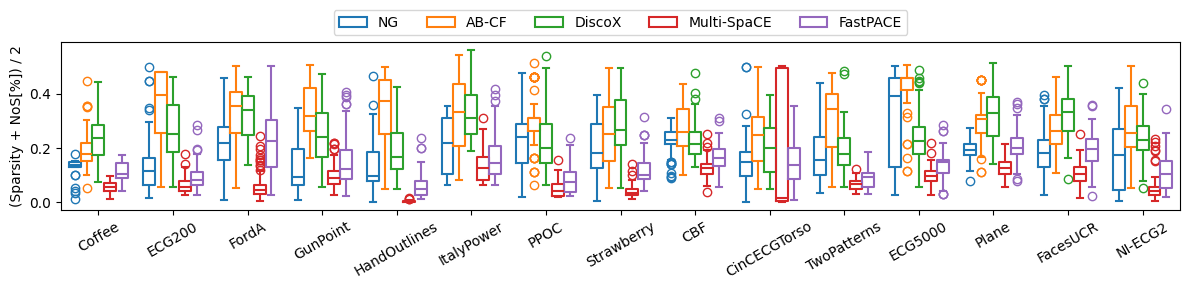

In [19]:
plt.figure(figsize=(12, 3))
ax = sns.boxplot(data=aux_df, x="Dataset", y="(Sparsity + NoS[%]) / 2", hue="Method", fill=False)
# ax.legend(loc='upper right')
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=6, title=None)
ax.set(xlabel=None)
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('./experiments/results/img_univariate-sparsity-contiguity.PNG', dpi=300)

# Counterfactual visualization

In [7]:
import math
def plot_comp_cfs(x_orig, possible_nuns, x_cfs_dict):
    
    # Calculate auxiliary variables
    method_names = list(x_cfs_dict.keys())
    x_cfs = list(x_cfs_dict.values())
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # Define outer grid
    fig = plt.figure(figsize=(18, 12), dpi=600)
    grid_columns = 2
    grid_rows = math.ceil(len(x_cfs) / grid_columns)
    outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0.2, hspace=0.3)

    # Iterate through outer grid plots
    for m, outer in enumerate(outer_grid):
        try:
            # Get change mask 
            x_cf = x_cfs[m]
            method_name = method_names[m]
            """# Get nuns used by the method depending on the name
            if "gknn" in method_name:
                nun_example = possible_nuns["gknn"]
            elif "iknn" in method_name:
                nun_example = possible_nuns["iknn"]
            else:
                raise ValueError('Not detected NUN finding procedure in name. Method name must contain "gknn" or "iknn"')"""
            # found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
            proximity_values = np.abs(x_orig - x_cf.reshape(1, length, n_channels))
            found_counterfactual_mask = (proximity_values > np.abs(x_orig)/proximity_values*0.0001).astype(int)
            diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
        except IndexError:
            break
    
        # Create inner grid
        inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0.2, hspace=0.2, subplot_spec=outer)
        sub_channel_axs = []
        for i in range(n_channels):
            ax = plt.Subplot(fig, inner_grid[i])
            # ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
            ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
            ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
            # Set title if first channel
            if i == 0:
                ax.set_title(method_name)
            
            # Add fill to changes
            starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
            ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
            # Iterate over the mask segments and fill them with red color
            for i in range(0, len(starts)):
                start_idx = starts[i]
                end_idx = ends[i]
                # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
                ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
            
            # Add ax to list of subplots
            fig.add_subplot(ax)
            sub_channel_axs.append(ax)

    # Plot figure
    fig.legend(
        sub_channel_axs,     # The line objects
        labels=['x_cf', 'x_orig'],   # The labels for each line
        loc='center',
        prop={'size': 12}
    )
    plt.tight_layout()
    plt.show()
    # plt.savefig(f'./experiments/results/examples_cfs_{dataset}_instance_{instance_index}.png', dpi=600)



In [9]:
dataset = "ECG200"
aux_results_dataset = results_all_datasets_df[results_all_datasets_df["dataset"]==dataset].sort_values(by="ii")

with pd.option_context("display.max_rows", None,): 
    display(aux_results_dataset[aux_results_dataset["method"]=="NG"])

,ii,nchanges,sparsity,L1,L2,proba,valid,nuns_valid,AE_OS,IF_OS,...,AE_IOS,IF_IOS,LOF_IOS,subsequences,subsequences %,times,method,best cf index,order,dataset
0,0,96,1.0,11.176803,2.836096,0.669986,True,NaN,0.737255,0.102865,...,0.100830,0.007866,0.150205,1,0.020833,0.984377,NG,0,1,ECG200
1,1,96,1.0,15.059444,3.799242,0.615739,True,NaN,0.969174,0.180713,...,0.022579,0.000000,0.195510,1,0.020833,0.847701,NG,0,1,ECG200
2,2,96,1.0,3.349696,1.072140,0.526358,True,NaN,0.609642,0.485920,...,0.000000,0.011179,0.000000,1,0.020833,0.511801,NG,0,1,ECG200
3,3,96,1.0,11.757912,3.471872,0.511285,True,NaN,0.558521,0.076494,...,0.093470,0.000000,0.232751,1,0.020833,0.703068,NG,0,1,ECG200
4,4,96,1.0,23.860805,3.521921,0.518223,True,NaN,0.889295,0.461393,...,0.000000,0.000000,0.094854,1,0.020833,2.562587,NG,0,1,ECG200
5,5,96,1.0,12.614443,3.757012,0.505208,True,NaN,0.662989,0.103616,...,0.012402,0.044330,0.575205,1,0.020833,0.875003,NG,0,1,ECG200
6,6,96,1.0,7.986494,2.202424,0.544636,True,NaN,0.769432,0.387269,...,0.042932,0.000000,0.000000,1,0.020833,0.656345,NG,0,1,ECG200
7,7,96,1.0,13.114409,4.168372,0.607764,True,NaN,0.881260,0.155390,...,0.025612,0.000000,0.073970,1,0.020833,0.828156,NG,0,1,ECG200
8,8,96,1.0,10.041811,2.260671,0.605800,True,NaN,0.608976,0.126784,...,0.006553,0.071275,0.085285,1,0.020833,1.109321,NG,0,1,ECG200
9,9,96,1.0,5.600481,2.078734,0.604133,True,NaN,0.691384,0.422396,...,0.149087,0.000000,0.000000,1,0.020833,0.515626,NG,0,1,ECG200


In [15]:
# methods = ["subspace_grouped", "subspace_v2_grouped", "subspace_individual", "subspace_v2_individual"]
common_index_instance = 58

Sample 58: true class 0, x_orig predicted 1, desired_class  0


C:\Users\mrefoyo\AppData\Local\Temp\ipykernel_11588\3917561263.py:63: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(
C:\Users\mrefoyo\AppData\Local\Temp\ipykernel_11588\3917561263.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


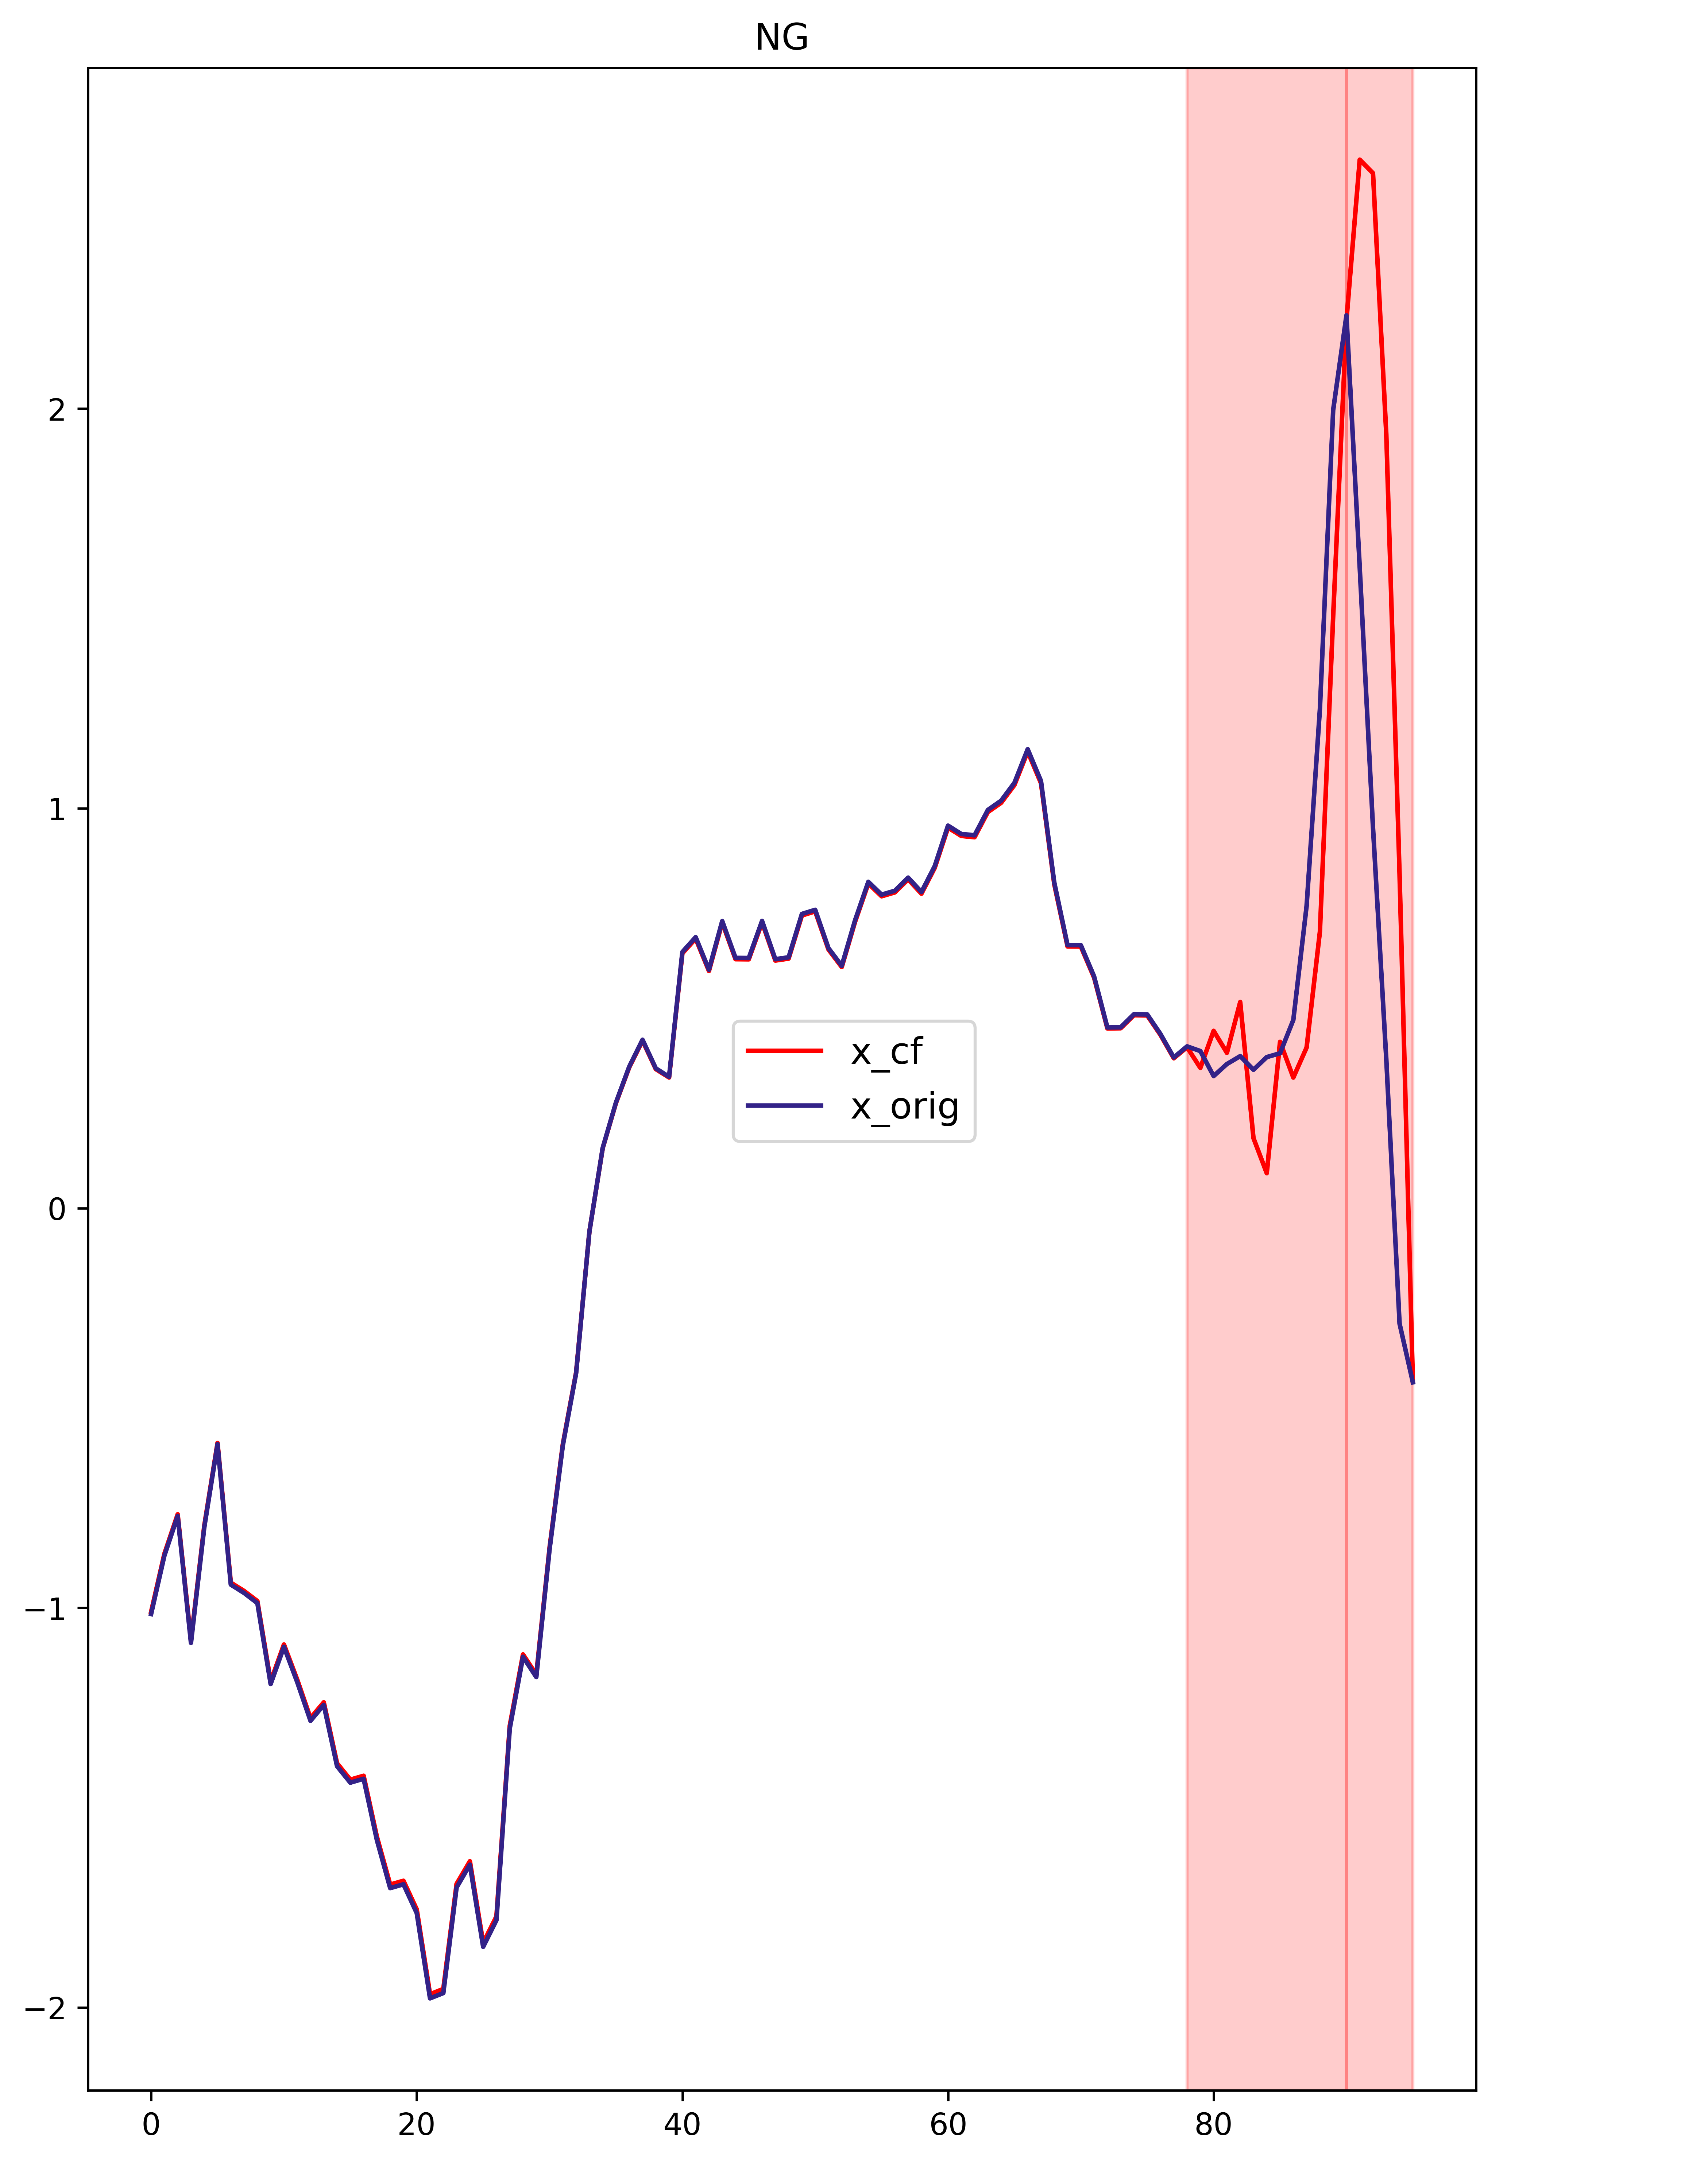

In [16]:
# Get data
X_train, y_train, X_test, y_test = data_dict[dataset]
common_indexes = common_test_indexes_dict[dataset]
instance_index = common_indexes[common_index_instance]

# Get common cfs calculated for all method
x_orig = X_test[instance_index]

# Get possible NUNs
possible_nuns = possible_nuns_dict[dataset]
possible_nuns_instance = {type: possible_nuns[type][instance_index] for type in ["gknn"]}

# Get original class and desired class
original_class = original_classes_dict[dataset][instance_index]
desired_class = desired_classes_dict[dataset][instance_index]

# Get the cf calculated for all methods
sol_cfs_methods = {}
sol_methods = methods_cfs_dict[dataset]
for method, solutions in sol_methods.items():
    if 'cfs' in solutions[0]:
        counterfactuals = [solution['cfs'] for solution in solutions]
    else:
        counterfactuals = [solution['cf'] for solution in solutions] 
    # Extract best counterfactual in case of multi objective
    counterfactual = counterfactuals[common_index_instance]
    # Extract best index solution
    aux_results_dataset_method = aux_results_dataset[aux_results_dataset["method"] == method]
    best_cf_index = aux_results_dataset_method.iloc[common_index_instance]["best cf index"]
    best_cf = counterfactual[best_cf_index]
    best_cf = np.expand_dims(best_cf, axis=0)
    # Append to dictionary
    sol_cfs_methods[method] = best_cf
    
# Show result
print(f'Sample {instance_index}: true class {y_test[instance_index]}, x_orig predicted {original_class}, desired_class  {desired_class}')
plot_comp_cfs(x_orig, possible_nuns_instance, sol_cfs_methods)